# Машинное обучение, ФКН ВШЭ

## Практическое домашнее задание 2. Градиентный спуск своими руками

### Общая информация

Дата выдачи: 09.02.2026

Мягкий дедлайн: 23.02.2026 23:59 MSK

Жесткий дедлайн: 01.03.2026 23:59 MSK


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). **Максимально допустимая оценка за работу — 10 баллов + 0.5 за социальный бонус.**

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

**Устная проверка.** Для проверки понимания кода и выводов студент может быть приглашён на устную защиту. Оценка за задание может быть изменена после устной защиты. Если студент не может объяснить ключевые части решения и принятые решения, работа считается недобросовестной и оценивается в 0 баллов независимо от автотестов.

### Формат сдачи

Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием, а также файлы `descents.py` и `linear_regression.py`. Сам ноутбук называйте в формате **homework-practice-02-gd-Username.ipynb**, где Username - ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 10


### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных модификаций градиентного спуска. В файле `descents.py` вам нужно будет реализовать несколько классов для различных вариаций градиентного спуска, а именно:
* `VanillaGradientDescent`
* `StochasticGradientDescent`
* `SAGDescent`
* `MomentumDescent`
* `Adam`


В файле `linear_regression.py` вам необходимо будет реализовать класс `CustomLinearRegression` для обучения линейной регрессии (и, разумеется, предсказания целевой переменной на основе обученной модели).


### Про предложенную архитектуру

Предложенная вам архитектура шаблонов написана по принципам SOLID: основная ее идея в том, что вы сможете использовать различные лоссы и оптимизаторы с одним и тем же кодом прочих классов, никак не изменяя и не переписывая методы классов, которые с оптимизаторами и лоссом взаимодействуют. Мы добиваемся этого при помощи выделения интерфейсов (в Python мы достигаем этого при помощи абстрактных классов, см дальше в заданиях) и выделения зон ответственности каждого класса.

Глобально в нашей архитектуре всего 4 интерфейса (некоторые из которых на самом деле сразу concrete классы), каждый из которых порождает одно семейство:
- `interfaces.LossFunction`
  - Классы, имплементирующие этот интерфейс, отвечают за одну конкретную функцию потерь, используемую при обучении, и всё, что меняется вместе с ней при её замене: подсчёт лосса, подсчет градиента и аналитическое решение (если есть, то добавляется в интерфейс соответствующим mixin-ом).
- `interfaces.LinearRegressionInterface`
  - Интерфейс обертки для модели линейной регрессии, контейнер, содержащий составные части (лосс-функцию и оптимизатор) и использующий их для выполнения содержательной работы.
- `interfaces.LearningRateSchedule`
 - Простенькое семейство расписаний, определяющих шаг обучения для каждой итерации
- `interfaces.AbstractOptimizer`.
  -  Классы, имплементирующие этот интерфейс, имплементируют конкретный алгоритм оптимизации и всё, что происходит в его процессе. Пользуются обёрткой линейной регрессии для доступа к данным и вызова расчетов, чтобы не зависеть напрямую от конкретных функций потерь и шедулеров шага обучения.

Концепция передачи маленьких объектов, отвечающих за свою маленькую зону ответственности внутрь более сложного объекта для выполнения ими составных частей работы называется Dependency Injection, и работает как раз за счет выделения зоны ответственности и опоры на интерфейс вместо реализации.

Посмотрите на код `linear_regression.CustomLinearRegression`: она принимает в себя объекты с интерфейсами `LossFunction` и `AbstractOptimizer`, а в `descents.BaseDescent` как уточнении интерфейса абстрактного оптимизатора до итеративных оптимизаторов видно, что он в свою очередь принимает при инициализации объект шедулера шага обучения.

Благодаря этому, код, который использует эти классы, может по очереди:
- Инициализировать нужный шедулер с нужными параметрами для задания шага обучения
- Иницализировать оптимизатор, задав ему нужные параметры процесса и передав готовый шедулер
- Инициализировать класс линейной регрессии нужной под задачу функцией потерь и уже готовым оптимизатором.
- Запустить процесс обучения

И на любом этапе можно использовать другой объект с подходящим интерфейсом, и всё будет работать!


**В ходе выполнения этой домашки вы наполните все эти семейства классов различными имплементациями и будете менять их на ходу как перчатки!**

Более подробно про наследование классов в Python можно прочитать здесь:
* Наследование: https://docs.python.org/3/tutorial/classes.html#inheritance
* Абстрактные классы: https://docs.python.org/3/library/abc.html



## Задание 1. Линейная регрессия  (1 балл)

### Градиент функции потерь MSE

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2025-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.3 балла).

Напомним, что функция потерь MSE записывается как:

$$
    Q(w) = \frac{1}{\ell} \sum \limits_{i = 1}^\ell (y_i - \langle x_i, w \rangle)^2 = \frac{1}{\ell} \| X w - y \|^2
$$

где $\ell$ – количество объектов в выборке, $X \in \mathbb{R}^{\ell \times d}$ – матрица "объект-признак", а $y \in \mathbb{R}^\ell$ – целевая переменная. Через $x_i$ обозначается $i$-ая строчка матрицы $X$, отвечающая за $i$-й объект выборки.

- **Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.**

**Решение:**
1. Запишем функцию потерь MSE:
$$  
    Q(w) = \frac{1}{\ell} \| X w - y \|^2_2 = \frac{1}{\ell} (X w - y)^\top (X w - y)
$$
2. Собсна найдём градиент
$$
    \nabla Q(w) = \frac{1}{\ell} \cdot \nabla  (((X w)^\top - y^\top) \cdot (X w - y)) = \frac{1}{\ell} \cdot \nabla (w^\top X^\top X w - w^\top X^\top y - y^\top X w + y^\top y)
$$ 
3. Т.к. $ w^\top X^\top y \space - $ скаляр, то $ w^\top X^\top y = y^\top X w $
$$
    \nabla Q(w) = \frac{1}{\ell} \cdot \nabla (w^\top X^\top X w - 2 w^\top X^\top y  + y^\top y) = \frac{1}{\ell} \cdot (2 X^\top X w - 2 X^\top y) = \frac{2}{\ell} \cdot (X^\top X w - X^\top y)
$$
$$
    \nabla Q(w) = \frac{2}{\ell} \cdot (X^\top X w - X^\top y)
$$


- **Имплементируйте методы `MSELoss.loss`, `MSELoss.gradient`**

### Задание 1.1 Аналитическое решение и `CustomLinearRegression` (0.7 балла)

Перед тем, как мы углубимся в итеративные методы оптимизации, давайте вспомним, что для ряда функций потерь существует и аналитическое решение. Давайте сперва вспомним, как оно выглядит для MSE.

- **Выведите формулу оптимальных $w$ в задаче минимизации MSE, и запишите её ниже.**
1. Оптимальное $w$ достигается при $\nabla Q(w) = 0$, т.е.
$$
    X^\top X w = X^\top y \iff w = (X^\top X)^{-1} X^\top y
$$

- **Имплементируйте подсчет этого решения в `MSELoss._plain_analytic_solution`**

$$\text{MSE} = \| X w - y \|^2$$

**Вопрос**: Как мы помним, у аналитического решения есть минусы - какие?

**Ответ**: во-первых если у нас есть линейно зависимые признаки, то матрица $X^\top X$ необратима, либо если мы как-то добавим шум или еще какую-то дичь, то у нас будут взрываться значения и получится какое-то месиво. Во-вторых взятие обратной матрицы по уровню сложности сопоставимо со взятием иерусалима, а именно асимптотика $(X^\top X)^{-1}$ составляет $o(n^3)$, если $n - \space$ размерность матрицы $X^\top X$

Теперь прокинем это решение в наш класс линейной регрессии, чтобы получше разобраться в архитектуре.


- **Допишите класс `descents.AnalyticSolutionOptimizer`**
- **Допишите класс `CustomLinearRegression`**
  - В нем на текущем этапе нужно имплементировать все методы: `fit` и `predict` вам понадобятся прямо сейчас, а `compute_gradients` и `compute_loss` в следующей части.

Помните, про разделение ответственности классов!

За контроль процесса обучения отвечает оптимизатор, а объект линейной регрессии по факту выступает точкой входа, контейнером для данных и способом доступа к вычислениям, на основе которых оптимизатор принимает решения (e.g. значение антиградиента в точке весов).

При этом сам по себе оптимизатор должен быть универсален, в нем никак не должны содержаться детали, связанные с конкретными функциями потерь, все необходимое от них он может получить через `self.model`.

Аналогично, класс линейной регрессии тоже должен быть универсальным и готовым к работе с любыми лоссами и оптимизаторами, исполняющими заявленный интерфейс. Здесь применена dependency injection, и вы должны грммотно ее поддержать в своей имплементации. Аналогично, все, что вам может быть нужно от функций потерь, вы можете получить при помощи обращения к переданному объекту.

In [43]:
import numpy as np
from linear_regression import MSELoss, CustomLinearRegression, AnalyticSolutionOptimizer

num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [44]:
!source .venv/bin/activate
#%pip install -U scikit-learn

from sklearn.metrics import mean_squared_error as mse
import sklearn

sklearn_linreg = sklearn.linear_model.LinearRegression(fit_intercept=False)
sklearn_linreg.fit(x, y)
print("Sklearn MSE", mse(sklearn_linreg.predict(x), y))

your_linreg = CustomLinearRegression(AnalyticSolutionOptimizer(), loss_function=MSELoss())
your_linreg.fit(x, y)
print("Your MSE", mse(your_linreg.predict(x), y))

assert abs(mse(your_linreg.predict(x), y) - mse(sklearn_linreg.predict(x), y)) < 1e-12, "Не повезло, попробуйте еще раз"

Sklearn MSE 0.07975775215303142
Your MSE 0.07975775215303142


Давайте сделаем задание немного прикольнее и изменим одну из колонок. Как мы знаем, полная мультиколлинеарность запрещает нам пользоваться аналитическим решением, но `sklearn` по какой-то причине это обходит, хмм

In [45]:
x[:, 3] = x[:, 2] + x[:, 4]

In [46]:
sklearn_linreg = sklearn.linear_model.LinearRegression(fit_intercept=False)
sklearn_linreg.fit(x, y)
print("Sklearn MSE", mse(sklearn_linreg.predict(x), y))

your_linreg = CustomLinearRegression(AnalyticSolutionOptimizer(), loss_function=MSELoss())
your_linreg.fit(x, y)
print("Your MSE", mse(your_linreg.predict(x), y))

Sklearn MSE 0.08191741688587563
Your MSE 0.08191741688587563


Ваша задача - понять, как можно сделать так, чтобы аналитическое решение работало всегда, вне зависимости от матрицы X. Как оказывается, это можно сделать, если воспользоваться SVD разложением. Для имплементации воспользуйтесь `scipy.sparse.linalg.svds`.

- Выведите через SVD формулу оптимальных $w$ в задаче минимизации MSE. (сделано в этой же ячейке)

- Имплементируйте подсчет этого решения в `MSELoss._svd_analytic_solution`
    - Мир итерационных агоритмов причудлив. Если вы посмотрите на опции солверов svds, то увидите, что возможности вычислить точно все сингулярные числа вам не дают (propack рандомизированный и даст вам неточные ответы). Используйте стандартный солвер, выставьте максимальную доступную точность.

- Ответьте на **вопрос на засыпку**. Вообще говоря, в ряде случаев (например в нашем), даже такая неабсолютная на первый взгляд точность все равно позволяет получить точное решение задачи. Обоснуйте, почему? Как называется такой вид SVD? Какого минимального числа сингулярных чисел с вероятностью 1 будет достаточно в нашем случае для получения точного решения? Обоснуйте, почему.


$$\text{X} = \underset{n\times m}{\mathrm{U}} \ \underset{m\times m}{\mathrm{\Sigma}} \ \underset{m\times k}{\mathrm{V^T}}$$
$$ w = \mathrm{V} \mathrm{\Sigma}^{-1} \mathrm{U^\top} \mathrm{y} $$

**Ответ**:

- Такой вид SVD называется усечённое SVD. В SVD важны только несколько первых больших сингулярных чисел, которые как-то отражают реальные данные (дисперсия и прочая дичь), а маленькие сингулярные числа соответственно отражают шум или линейную зависимость (т.е. сингулярное число = 0), следовательно отбросив малые сингулярные числа мы избавляемся от линейной зависимости (+ у нас усечённое свд) и шума $\implies$ profit
- В данном случае, т.к у нас один линейно зависимый столбец из 5, то нам будет достаточно 4ех сингулярных чисел, т.к. тогда мы полностью сохраним ранг и вообще хорошо на душе будет 

In [47]:
sklearn_linreg = sklearn.linear_model.LinearRegression(fit_intercept=False)
sklearn_linreg.fit(x, y)
print("Sklearn MSE", mse(sklearn_linreg.predict(x), y))


your_linreg =  CustomLinearRegression(AnalyticSolutionOptimizer(),
                                      loss_function=MSELoss(analytic_solution_func=MSELoss._svd_analytic_solution))
your_linreg.fit(x, y)

print("Your MSE", mse(your_linreg.predict(x), y))

assert abs(mse(your_linreg.predict(x), y) - mse(sklearn_linreg.predict(x), y)) < 1e-12, "Не повезло, попробуйте еще раз"

Sklearn MSE 0.08191741688587563
Your MSE 0.08191741688587563


## Задание 2. Реализация градиентного спуска (4 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`. При помощи них мы будем искать итеративные решения, подавая оптимизаторы внутрь нашей `CustomLinearRegression`.

### Напоминание про градиентный спуск

Основное свойство антиградиента &ndash; он указывает в сторону *наискорейшего* убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь $\eta_{k}$ обозначает длину шага на $k$-ой итерации (learning rate), а $Q(w)$ - функцию потерь (loss function).

Градиент для MSE вы уже нашли выше

### Задание 2.0. Learning Rate Schedules (0.2 балла)

Обратите внимание на **абстрактный** класс `LearningRateSchedule` в файле `descents.py`. С помощью его имплементаций мы на каждой итерации градиентного спуска будем получать соответствующий `learning_rate` $\eta_k$.

В файле уже реализован класс `ConstantLR`, который на каждой итерации возвращает один и тот же заранее заданный шаг. **Ваша задача в этом пункте – реализовать `TimeDecayLR`**, который мы будем использовать для обучения линейной регрессии. Формула очередного шага должна выглядеть следующим образом:
$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Задание 2.1. Родительский класс BaseDescent (1 балл).


Внимательно изучите устройство класса `BaseDescent`. У него есть один непомеченный абстрактным метод, который ему как частичному наследнику абстрактного класса нужно имплементировать - это `optimize`. В
этом методе необходимо имплементировать основной цикл обучения, и далее его будут переиспользовать все его наследники.

- **Допишите метод `BaseDescent.optimize`**


Для этого и всех дальнейших заданий необходимо соблюдать следующие условия:

* **Все вычисления должны быть векторизованы;**
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `_update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `CustomLinearRegression.loss_history`, в нём будем хранить *значения функции потерь до каждого шага, начиная с нулевого* (до первого шага по антиградиенту) и *значение функции потерь после оптимизации*.


Обратите внимание, что метод `_update_weights` всё ещё является абстрактным - его все ещё должны будут имплементировать дальнейшие наследники; фактически, только способом обновления весов они и отличаются. Она должна должна обновлять веса модели `self.model.w`, а также возвращать величину обновления $w_{k + 1} - w_k$.

Также обратите внимание на атрибут `self.iteration`, отвечающий за номер итерации алгоритма спуска. Как раз с помощью него (и `self.lr_schedule`) мы и будем получать `learning_rate` на соответствующей итерации алгоритма.

**Обратите внимание**

*да, в третий раз*

Все реализуемые вами классы спуска в задании - это *универсальные* оптимизаторы. Они не должны считать градиенты конкретной функции потерь внутри себя.

Для вычисления градиента они всегда обращаются к модели, с которой работают:

```
gradient = self.model.compute_gradients(X_batch, y_batch)
```

### Задание 2.2. Полный градиентный спуск VanillaGradientDescent (0.6 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Напомним, что шаг классического градиентного спуска выглядит следующим образом:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Важно**: Здесь и далее функция `_update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса модели `model.w`.

### Напоминание про SGD (стохастических градиентный спуск)

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов, обычно называемое **батчом**.

Оценка $\frac{1}{|B|} \sum \limits_{i \in B} \nabla_w q_i(w_k)$ называется **стохастическим градиентом** функции потерь, а получившийся метод называют методом **стохастического градиентного спуска** или просто SGD.

### Задание 2.3. Стохастический градиентный спуск StochasticGradientDescent (0.7 балла).

Реализуйте стохастический градиентный спуск, заполнив пропуски в классе `StochasticGradientDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться **гиперпараметром** метода и передаваться в конструктор класса `__init__(...)`. Семплировать индексы батча объектов $B$ можно с повторениями (через np.random.randint) - это допустимо и даёт несмещённую оценку градиента. По желанию можно без повторений (np.random.choice(..., replace=False) или через пермутацию по эпохам).

### Задание 2.4 Stochastic Average Gradient (0.6 балла)

Держим память последних индивидуальных градиентов $g_i$ по всем объектам и их среднее $\bar g = \frac{1}{\ell}\sum_i g_i$. На каждом шаге выбираем индексы $j$ (мини-батч), заново считаем $g_j^{new}(w_k)$, обновляем среднее:
$$
\bar g \leftarrow \bar g + \frac{1}{\ell}\bigl(g_j^{new} - g_j^{old}\bigr),\qquad
w_{k+1} = w_k - \eta_k \bar g.
$$
Инициализация: $g_i=0 \Rightarrow \bar g=0$.

Так получаем шаг почти как у полного градиента, но считаем градиент лишь на нескольких объектах за итерацию.

Реализуйте класс `SAGDescent` в `descents.py` с хранением `grad_memory` и `avg_grad`. Подсказка: чтобы получить пер-объектный градиент, можно вызывать `compute_gradients` на срезе из одного объекта `X[j:j+1]` или на фильтрованной индексами матрице для батча.

**Имейте в виду, что SAG достаточно капризный**: для его сходимости (и ее скорости) достаточно важен размер батча. Для вас установлено дефолтное значение, но на реальных данных его может быть недостаточно. В сравнениях методов ниже вам может понадобится подобрать значение размера батча, чтобы раскрыть потенциал метода. То ж касается и SGD, но в меньшей степени.

### Напоминание про метод инерции (или метод моментов)

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация (например, в случае **стохастического градиентного спуска**). Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 2.5 Метод Momentum - MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ являеться гиперпараметром метода, однако в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Напоминание про AdaGrad, RMSprop и Adam

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. Идея проста: мы будем "копить" сумму квадратов градиентов и делить очередной градиент на корень из этой суммы. Таким образом, обновление весов с большими градиентами будет тормозиться, а с маленькими наоборот получать большие шаги. Формула обновлени будет выглядить так:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафиксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций (метод инерции), а также делать адаптивную длину шага по каждому параметру (`RMSProp`). Таким образом, мы получим метод `Adam` с той лишь разницей, что в методе `Adam` дополнительно делается нормировка накопленных градиентов и квадратов градиентов для устранения смещения.

### Задание 2.6. Метод Adam (Adaptive Moment Estimation) (0.4 балла).

Реализуйте градиентный спуск с методом Adam, заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 3. Проверка кода (0 баллов)

Данная секция нужна для того, чтобы убедиться в правильности реализации методов спуска и класса `CustomLinearRegression`. В начале мы сделаем небольшую локальную проверку на "адекватность" и "запускаемость" ваших моделей, после чего уже можно будет делать посылки в Яндекс Контест.

In [48]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
#%autoreload 2

from descents import (
    VanillaGradientDescent,
    StochasticGradientDescent,
    SAGDescent,
    MomentumDescent,
    Adam
)

from linear_regression import CustomLinearRegression

In [50]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

Проверяем код на запускаемость.

In [51]:
descent_models = [
   VanillaGradientDescent,
   StochasticGradientDescent,
   SAGDescent,
   MomentumDescent,
   Adam
]

max_iter = 10
tolerance = 0
num_objects = 100
dimension = 5

for descent_model in descent_models:
   optimizer = descent_model(tolerance=tolerance, max_iter=max_iter)
   model = CustomLinearRegression(optimizer=optimizer)
   model.fit(x, y)
   assert len(model.loss_history) == max_iter + 1, "Loss history failed"
   y_pred = model.predict(x)
   assert y_pred.shape == y.shape, "Prediction shape does not match target variable"


Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://new.contest.yandex.ru/contests/90083/start).

Для каждой задачи из контеста вставьте ID успешной посылки и ваш ник (почту):

* **Ник/почта**: kvmosevnin@edu.hse.ru


* **VanillaGradientDescent**: 157290141


* **StochasticGradientDescent**: 157290167


* **SAGDescent**: 157290169


* **MomentumDescent**: 157290172


* **Adam**: 157290176


* **LinearRegression**: 157290206

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [52]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import (
    ConstantLR, TimeDecayLR,
    VanillaGradientDescent, StochasticGradientDescent,
    MomentumDescent, Adam, SAGDescent
)
from linear_regression import CustomLinearRegression

sns.set_theme()

In [53]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [54]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

Ниже построим график распределения целевой переменной

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

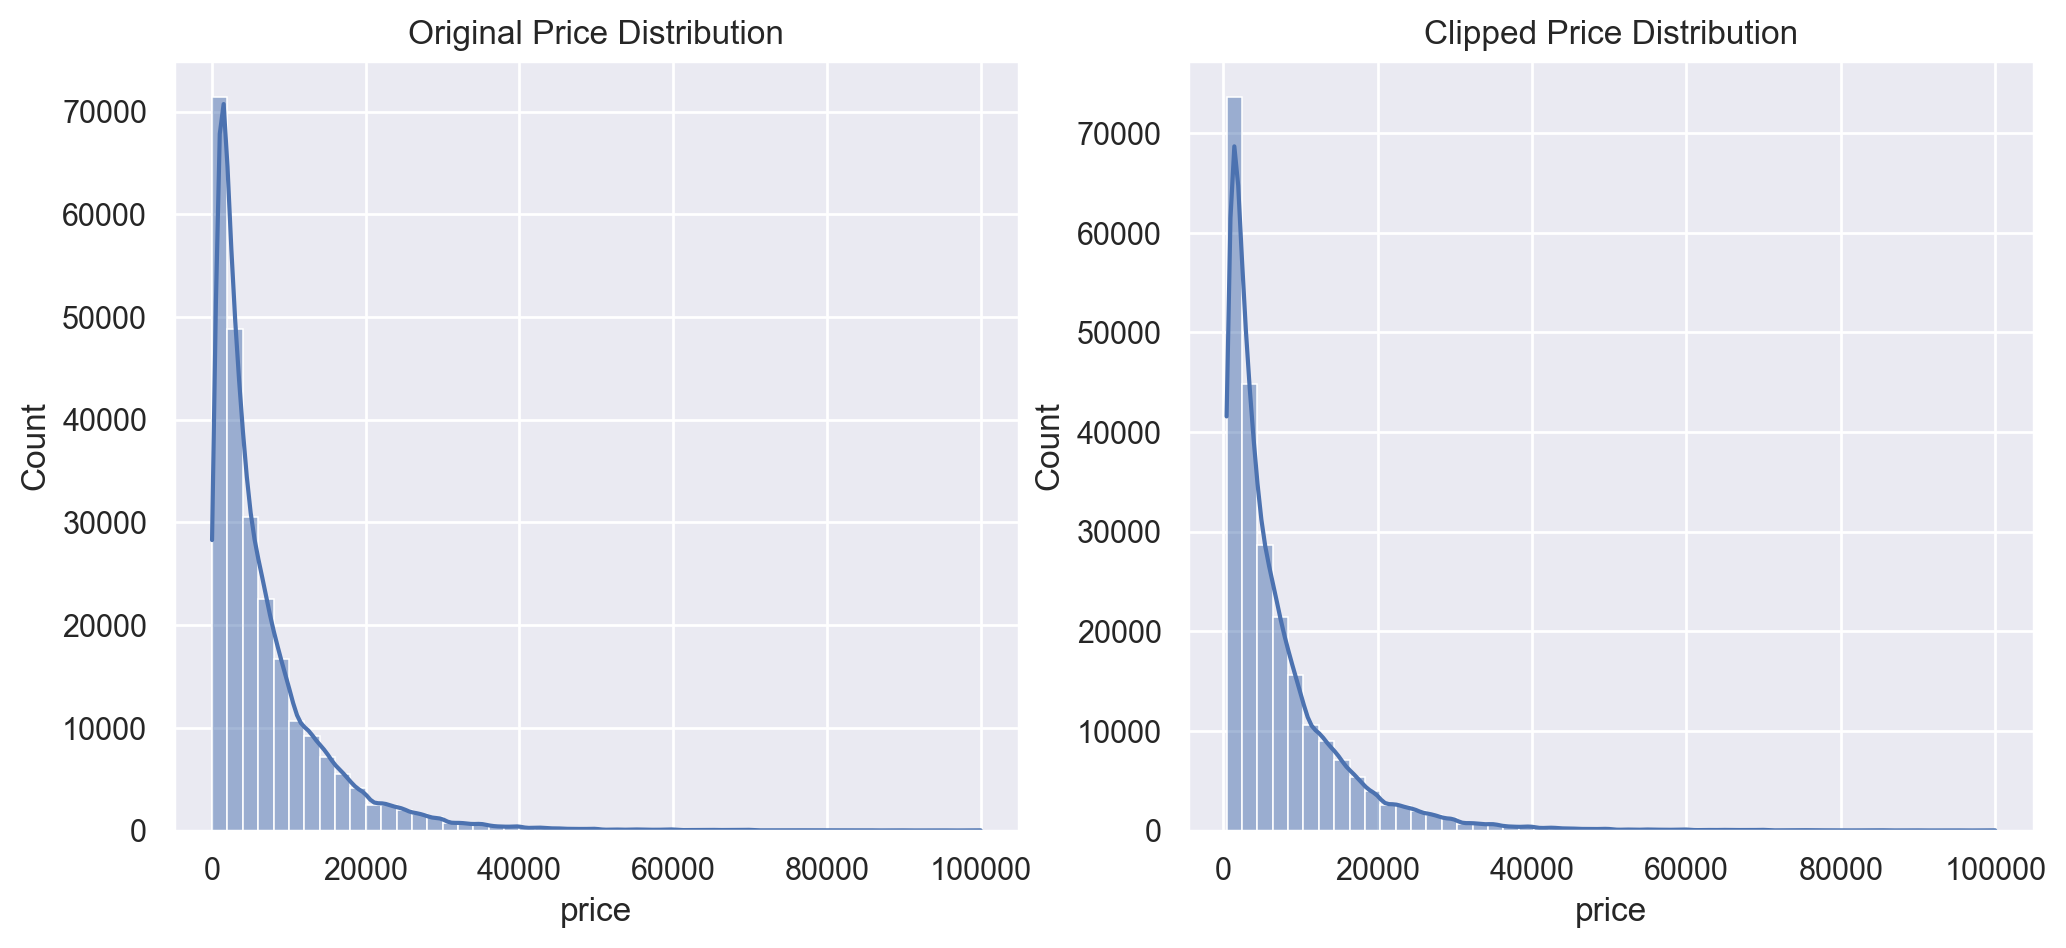

Data shape after removing price outliers: (234560, 10)


In [56]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Original Price Distribution')

q_low = data['price'].quantile(0.01)
q_high = data['price'].quantile(0.99)

valid_price = (data['price'] > 450) & (data['price'] < 150000)
data = data[valid_price]

plt.subplot(1, 2, 2)
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Clipped Price Distribution')
plt.show()

print(f"Data shape after removing price outliers: {data.shape}")


Честно говоря такое ощущение, что лучше не стало, но зато мы убрали выбросы. +можно заметить, что у нас распределение смещено к нулю, причем люто смещено, а также в основном в цене автомобиля нам важен только её порядок (это конечно грубость, но почти так оно и есть). Давайте ещё построим Q-Q plot (квантиль-квантиль)

In [57]:
import scipy.stats as stats

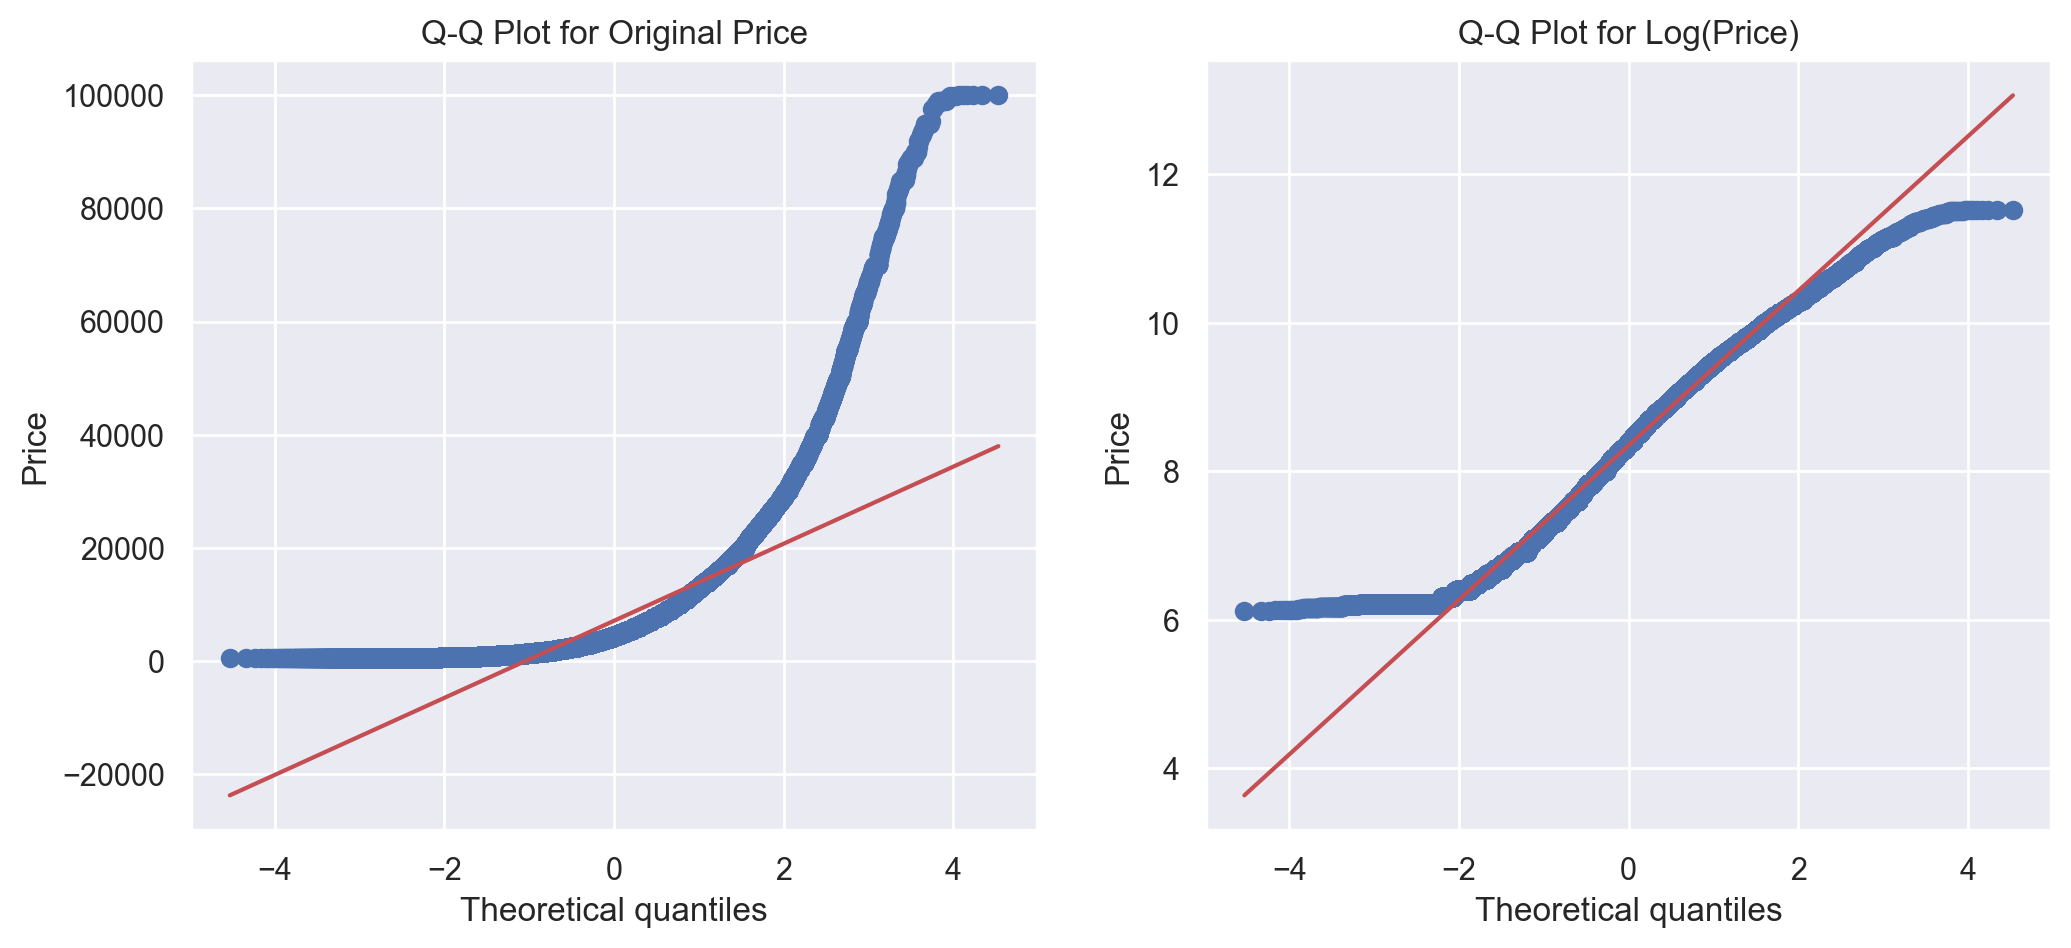

In [58]:
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1)

stats.probplot(data['price'], dist="norm", plot=plt)
ax1.set_title("Q-Q Plot for Original Price")
ax1.set_ylabel("Price")
ax1.grid(True)


ax2 = plt.subplot(1, 2, 2)
stats.probplot(np.log1p(data['price']), dist="norm", plot=plt)
ax2.set_title("Q-Q Plot for Log(Price)")
ax2.set_ylabel("Price")
ax2.grid(True)

plt.show()


In [59]:
data['price'] = np.log1p(data['price'])

Вот теперь другое дело, видно что если прологарифмировать, то распределение данных является почти нормальным (кроме отклонений на $\pm 3.5 \sigma$ и дальше, где $\sigma - $ стандартное отклонение), поэтому определённо стоит прологарифмировать, т.к. тогда уйдут хвосты и график станет линейным (что так то хорошо для линейной модели)

Теперь перейдём к EDA

In [60]:
display(data.isna().sum(), data.dtypes)

brand                0
model                0
vehicleType          0
gearbox              0
fuelType             0
notRepairedDamage    0
powerPS              0
kilometer            0
autoAgeMonths        0
price                0
dtype: int64

brand                    str
model                    str
vehicleType              str
gearbox                  str
fuelType                 str
notRepairedDamage        str
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                float64
dtype: object

Значит nan values нет (повезло-повезло)

Разделите признаки на категориальные, числовые и ... все остальное

In [61]:
categorical = ["brand", "vehicleType", "gearbox", "fuelType", "notRepairedDamage"]
numeric = ["powerPS", "kilometer", "autoAgeMonths"]
other = []

Добавляем в данные единичную колонку `bias`, чтобы не делать отдельные параметр $b$ для свободного члена модели.

In [62]:
data['bias'] = 1
other += ['bias']

X = data[categorical + numeric + other]
y = data['price']

Теперь вам необходимо разбить данные на обучающую, тестовую и валидационную выборки.

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=69)

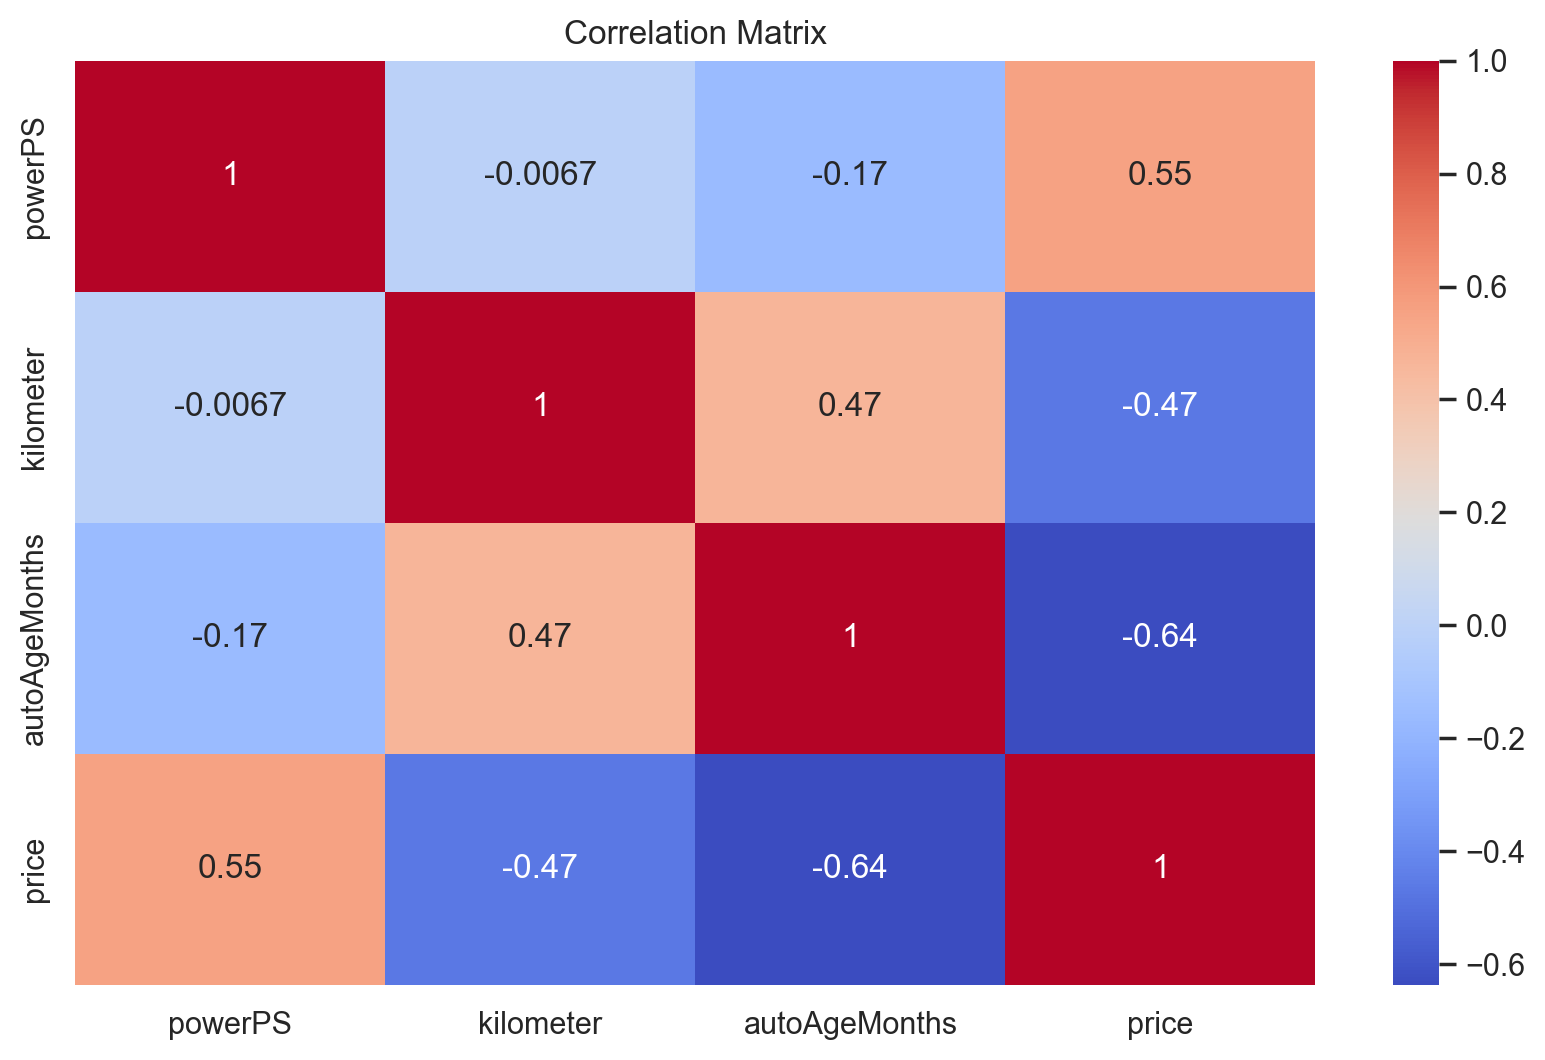

In [65]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[numeric + ['price']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Видно, что есть сильная положительная корреляция между ```powerPS``` и целевой переменной, а также аналогичные отрицательные корреляции между ```kilometer``` и ```autoAgeMonths``` (что в целом соответствует здравому смыслу)

In [66]:
data.nunique()

brand                  38
model                 249
vehicleType             8
gearbox                 2
fuelType                7
notRepairedDamage       2
powerPS               406
kilometer              13
autoAgeMonths         594
price                4743
bias                    1
dtype: int64

Т.к. у нас целых 249 моделей, то для них не будем строить ```sns.boxplot```, т.к. это тумач для такого дз + график будет грязный и ничего не будет поянтно. Построим его для остальных категориальных признаков (P.S: вообще уберём model, т.к. он имеет большую дисперсию и несёт мало смысла для обучения)

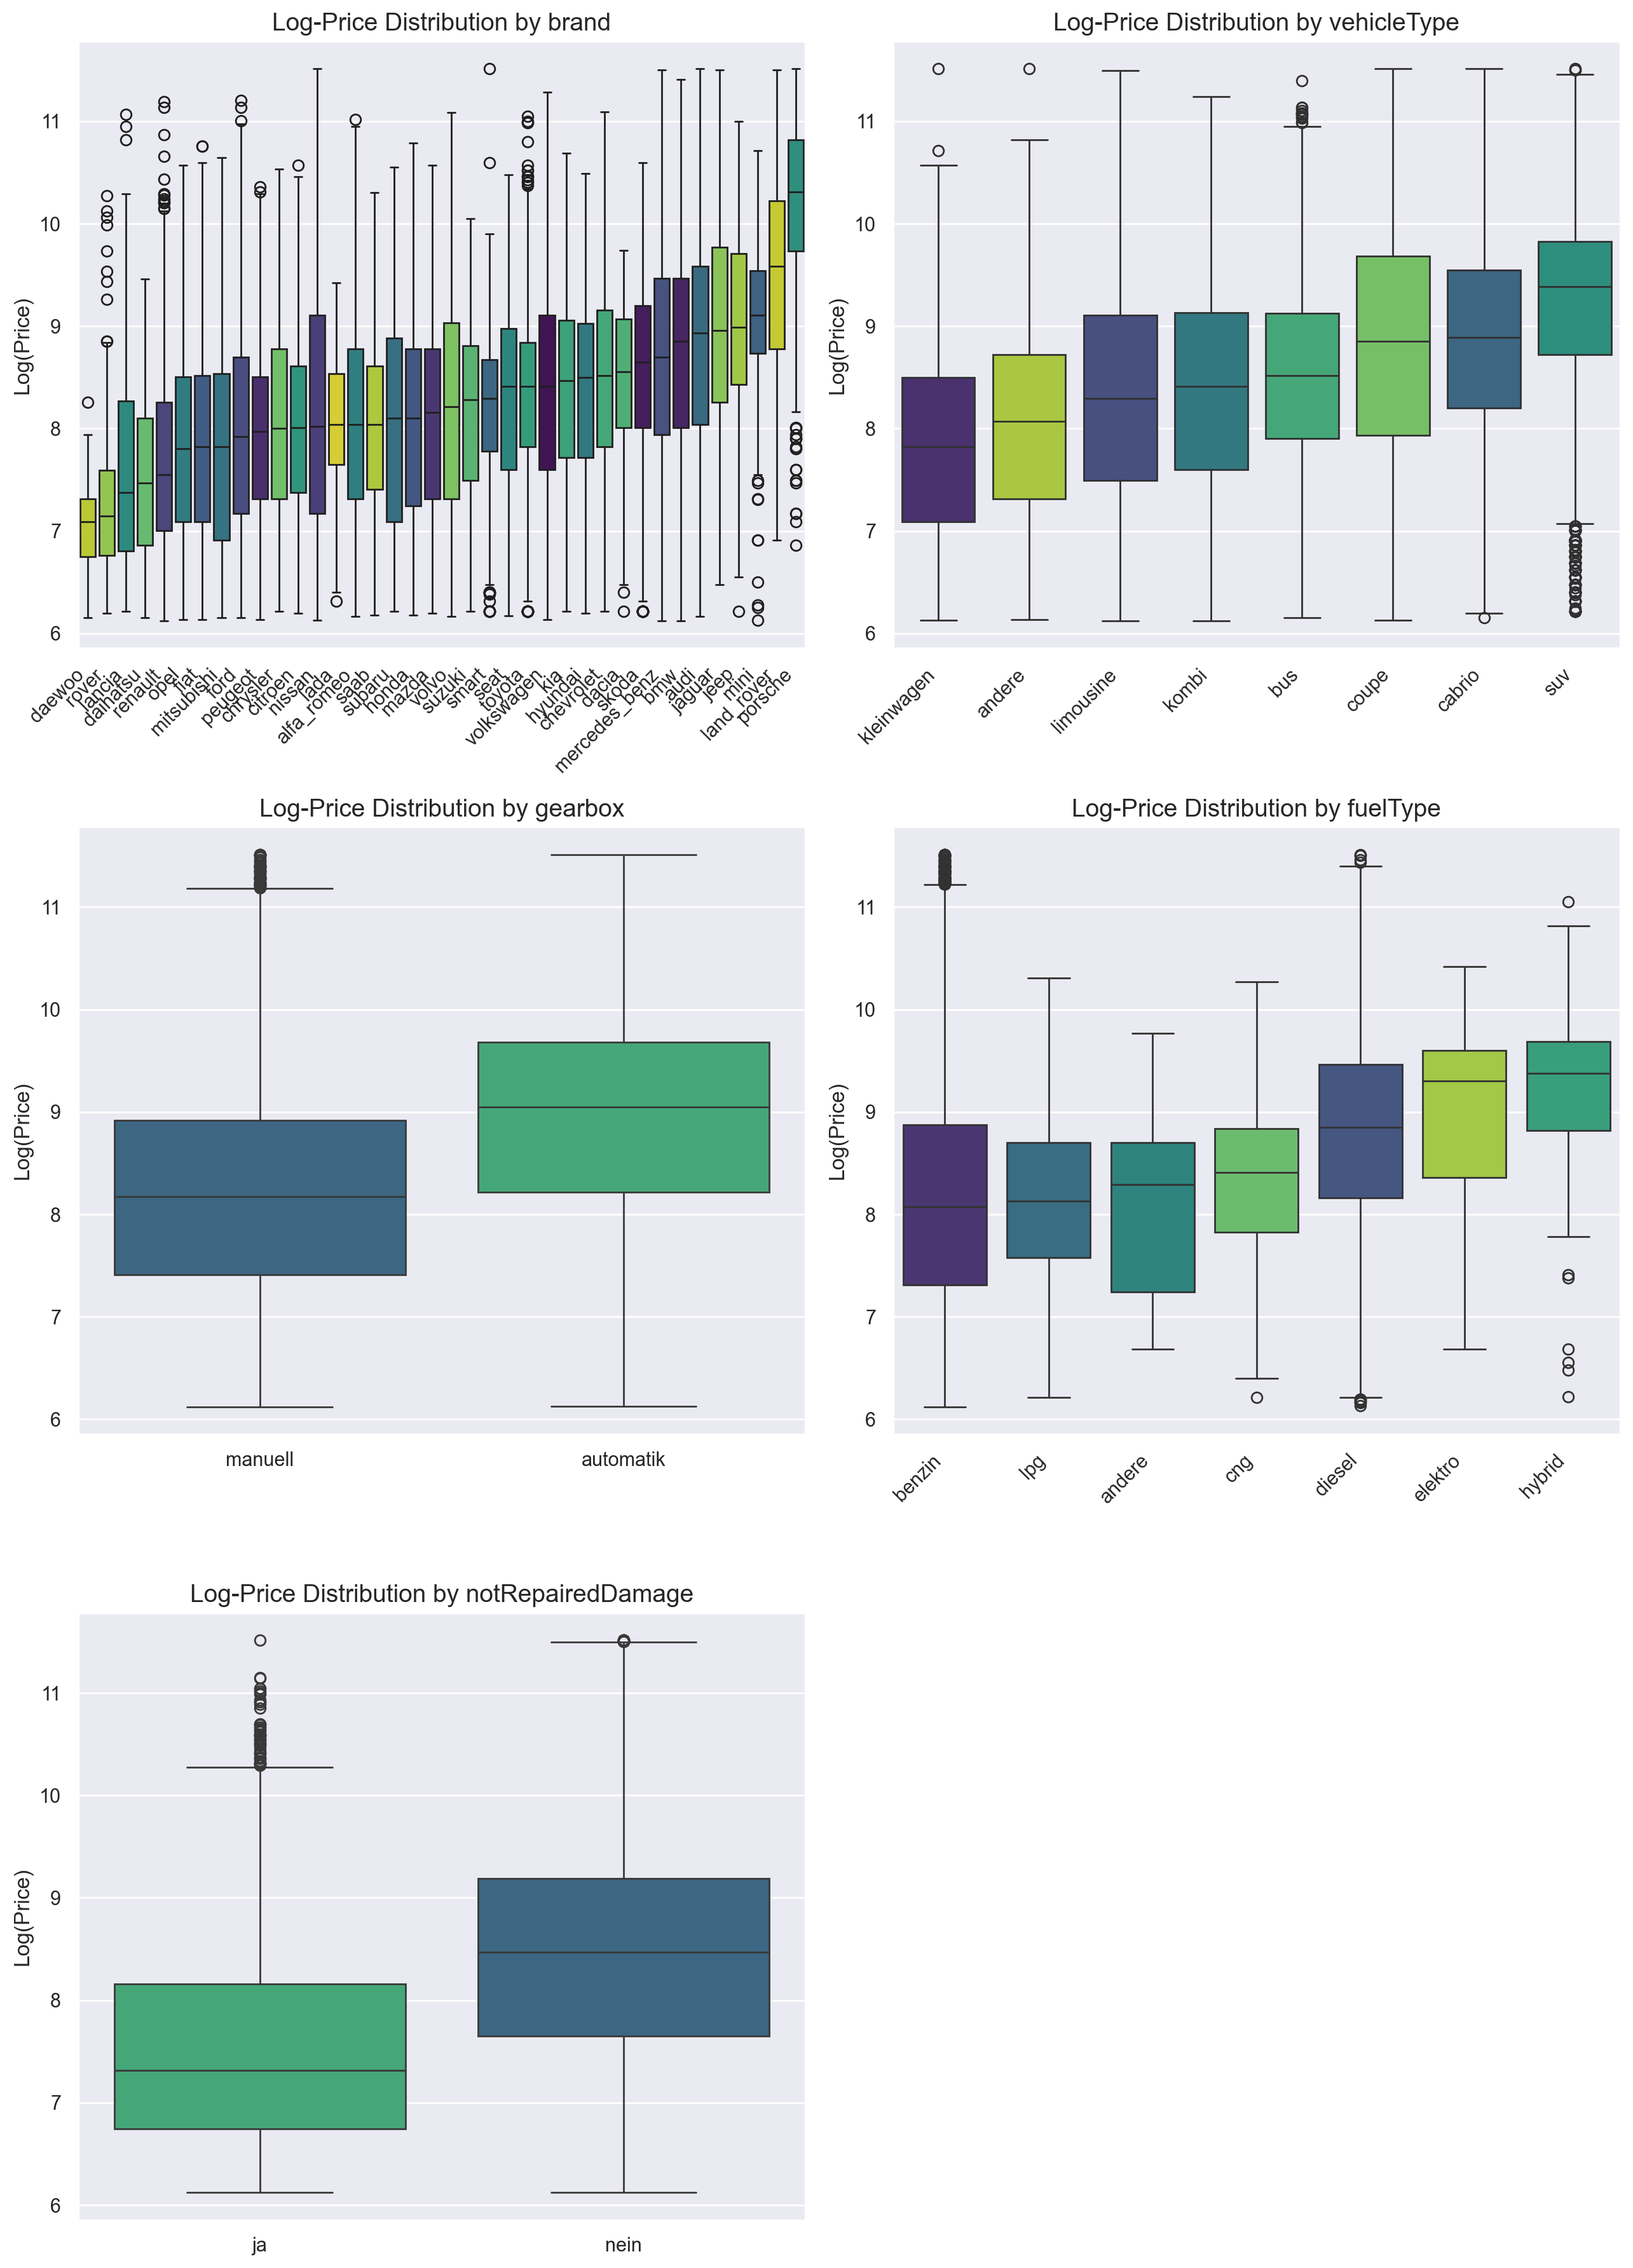

In [67]:
categorical_to_plot = ["brand", "vehicleType", "gearbox", "fuelType", "notRepairedDamage"]
num_plots = len(categorical_to_plot)
num_cols = 2
num_rows = int(np.ceil(num_plots / num_cols))

plt.figure(figsize=(13, 6 * num_rows))

for i, feature in enumerate(categorical_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    
    order = data.groupby(feature)['price'].median().sort_values().index
    
    sns.boxplot(x=feature, y='price', hue=feature, data=data, order=order, palette='viridis', 
        legend=False
    )
    
    plt.title(f'Log-Price Distribution by {feature}', fontsize=14)
    plt.ylabel('Log(Price)')
    plt.xlabel('') 
    
    if len(order) > 5:
        plt.xticks(rotation=45, ha='right') 

plt.tight_layout() 
plt.show()


Вроде бы всё нормально, только стоит ещё дополнительно посмотреть на ```data[data['notRepairedDamage'] == 'ja' && data['price'] >= 10.25]['price']```, а также на ```vehicleType == 'suv'```, т.к. там тоже странное скомпление дешевых авто, хотя IQR у них самый большой

In [68]:
data_not_repaired = data[(data['notRepairedDamage'] == 'ja') & (data['price'] >= 10.25)]
data_not_repaired.head(15)

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,bias
7439,audi,andere,limousine,automatik,diesel,ja,313,150000,24,10.404293,1
10190,volkswagen,passat,limousine,automatik,diesel,ja,150,20000,18,10.305647,1
26454,bmw,m_reihe,coupe,automatik,benzin,ja,420,70000,62,10.308653,1
29911,mercedes_benz,c_klasse,kombi,automatik,diesel,ja,170,150000,64,11.002117,1
32658,mercedes_benz,andere,coupe,automatik,benzin,ja,557,80000,52,10.584081,1
34782,porsche,911,coupe,manuell,benzin,ja,286,150000,225,10.419331,1
38977,fiat,andere,andere,automatik,diesel,ja,170,60000,27,10.308986,1
41009,audi,a5,coupe,manuell,diesel,ja,150,30000,22,10.271631,1
49834,mercedes_benz,e_klasse,cabrio,automatik,diesel,ja,265,80000,44,10.518700,1
60808,mercedes_benz,viano,bus,automatik,diesel,ja,163,50000,47,10.266428,1


Видимо здесь всё же всё ок и высокая цена, несмотря на поломку, обусловлена премиальностью бренда и типом кузова автомобия

In [69]:
data_suv = data[(data['vehicleType'] == 'suv') & (data['price'] <= 7)]
data_suv.head(15)

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,bias
2018,ford,andere,suv,automatik,benzin,ja,204,150000,217,6.552508,1
2197,nissan,andere,suv,manuell,benzin,nein,124,150000,252,6.857514,1
2526,ford,andere,suv,automatik,lpg,ja,207,150000,210,6.908755,1
3931,mitsubishi,pajero,suv,manuell,benzin,ja,120,150000,195,6.685861,1
7333,renault,r19,suv,automatik,benzin,nein,73,150000,255,6.802395,1
7471,daihatsu,andere,suv,manuell,benzin,ja,90,150000,320,6.621406,1
8153,ford,andere,suv,manuell,lpg,ja,140,150000,322,6.857514,1
12177,mitsubishi,andere,suv,manuell,benzin,ja,150,150000,198,6.398595,1
13730,kia,sportage,suv,manuell,benzin,nein,128,150000,222,6.447306,1
15008,opel,andere,suv,manuell,diesel,ja,101,150000,268,6.746412,1


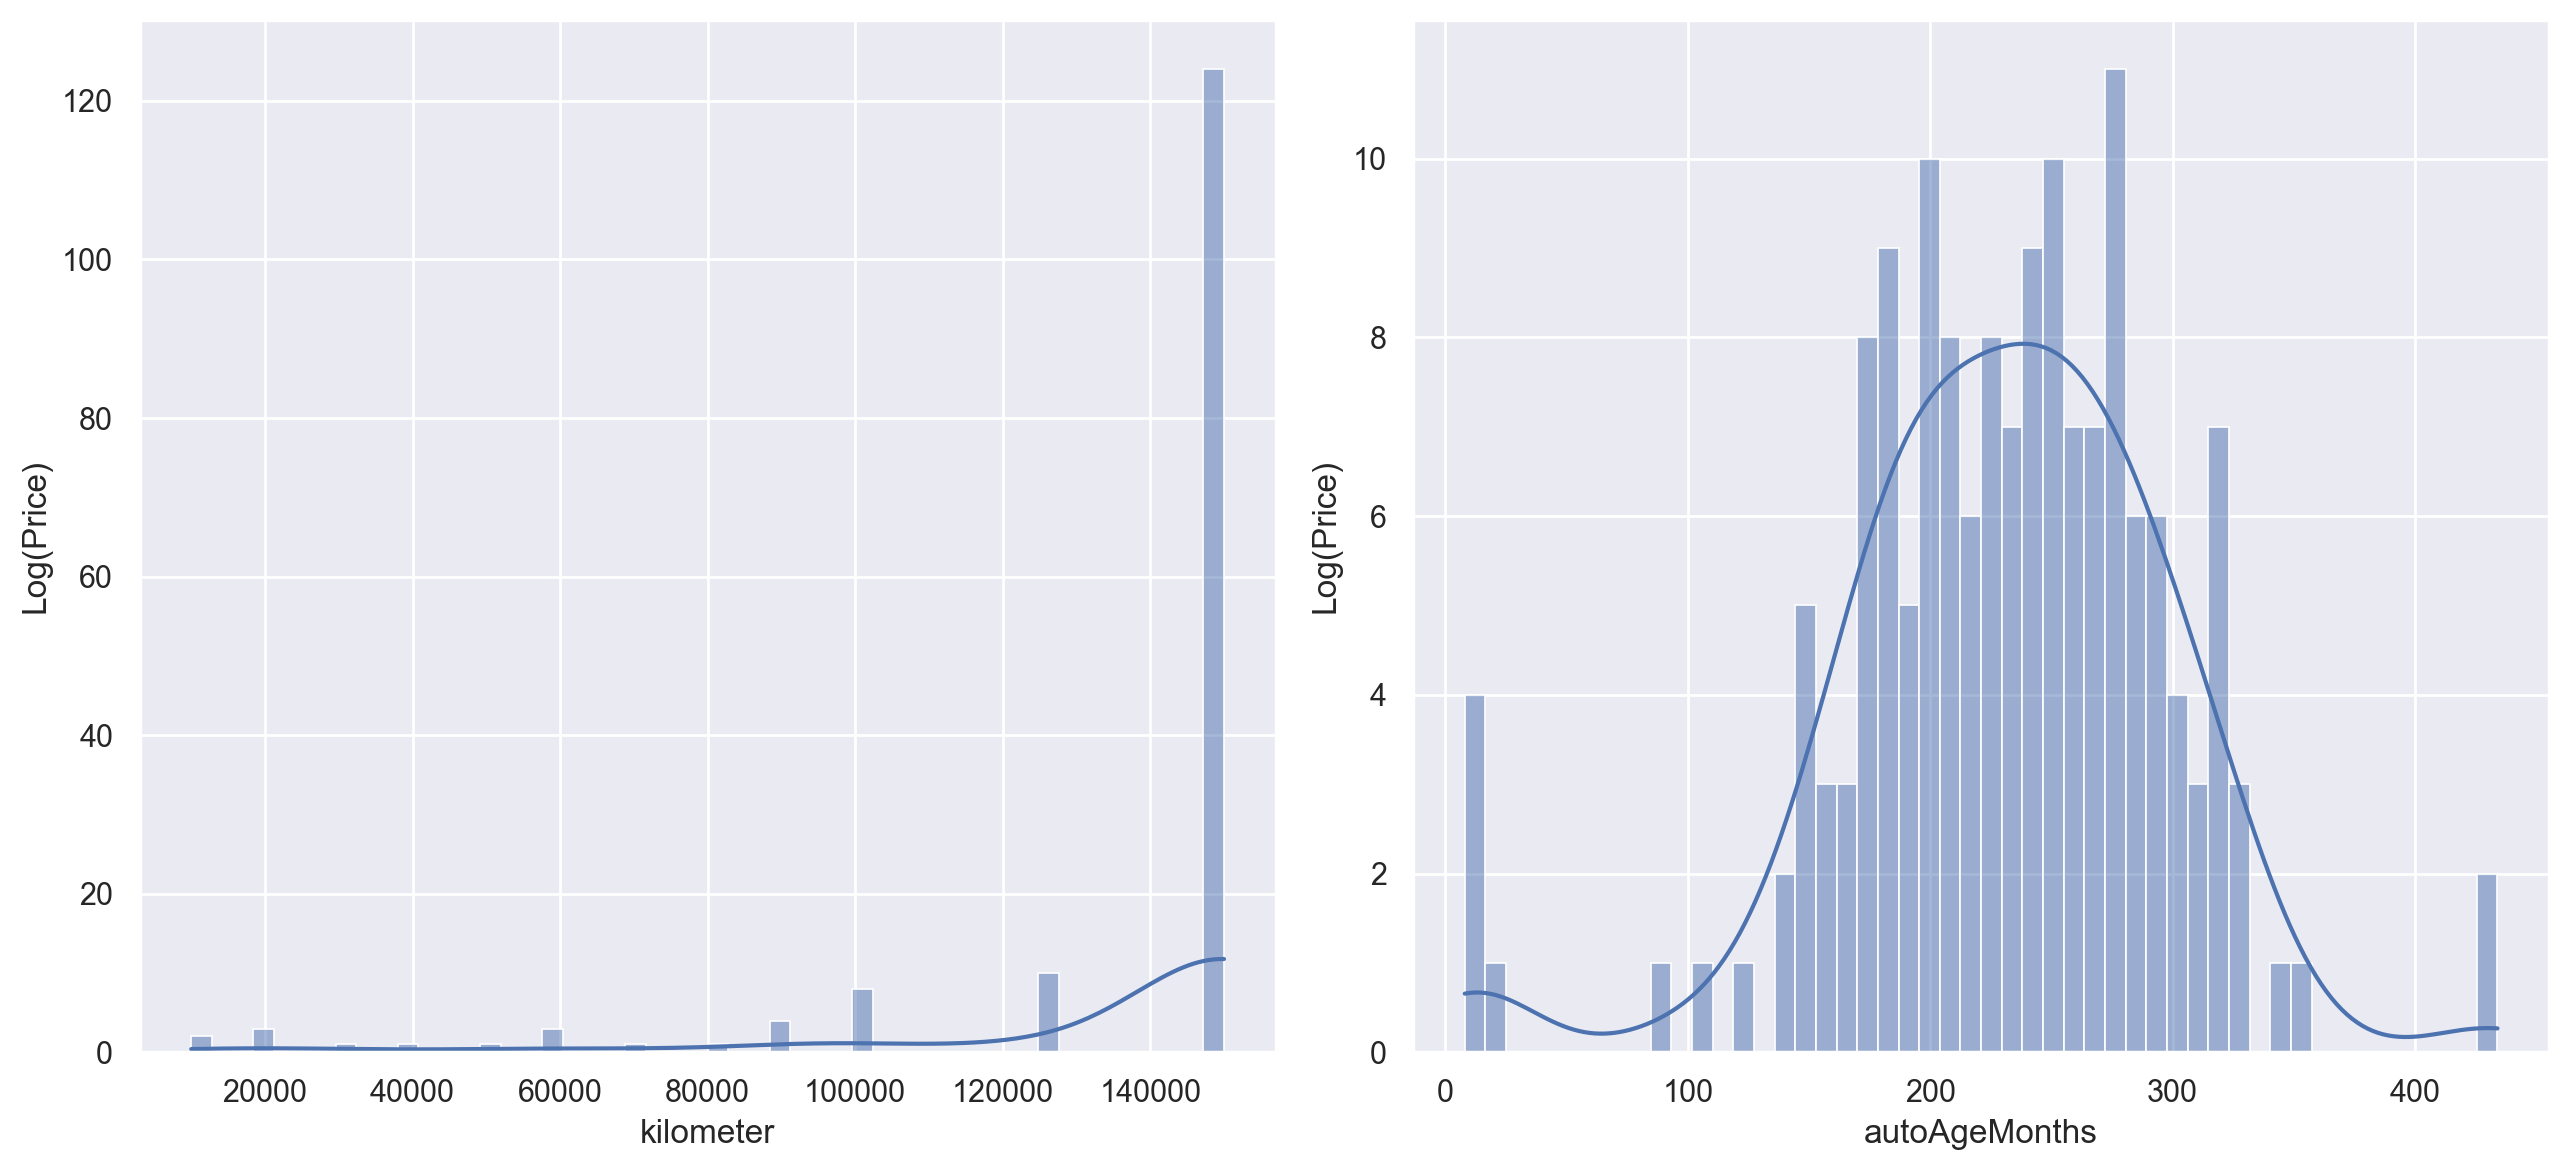

In [70]:
plt.figure(figsize=(13, 6))

plt.subplot(1, 2, 1)

sns.histplot(data_suv['kilometer'], kde=True, bins=50)
plt.ylabel('Log(Price)')
plt.xlabel('kilometer')

plt.subplot(1, 2, 2)

sns.histplot(data_suv['autoAgeMonths'], kde=True, bins=50)
plt.ylabel('Log(Price)')
plt.xlabel('autoAgeMonths')

plt.tight_layout()
plt.show()

А также сделаем базовую обработку данных, а именно:
* Применим `OneHotEncoding` к категориальным признакам
* Стандартизуем численные признаки с помощью `StandardScaler`
* Остальные признаки трогать не будем, т.к. с ними непонятно что делать

> А почему мы сначала делим данные, а только потом применяем обработку данных? Энкодеры и скейлеры используют информацию о данных: если сделать fit на всем датасете до split, это будет утечка: статистики из val/test попадут в обучение.

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

X_train = column_transformer.fit_transform(X_train)
X_val = column_transformer.transform(X_val)
X_test = column_transformer.transform(X_test)

y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

## Задание 5. Сравнение методов градиентного спуска (1.5 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.75 балла)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [72]:
from sklearn.metrics import r2_score

In [73]:
lambdas = np.logspace(-6, 3, num=30)
optimizers = [
    (VanillaGradientDescent, {}),
    (StochasticGradientDescent, {'batch_size' : 1024}),
    (SAGDescent, {'batch_size' : 128}),
    (MomentumDescent, {}),
    (Adam, {}),
]

best_lambdas = {opt_cls.__name__: None for opt_cls, _ in optimizers}
model_iter_history = {opt_cls.__name__: float("inf") for opt_cls, _ in optimizers}

models_res = []

for opt_cls, kwargs in optimizers:
    class_name = opt_cls.__name__
    best_loss = float("inf")

    for lr in lambdas:
        lr_scheduler = TimeDecayLR(lr)
        optimizer = opt_cls(lr_scheduler, **kwargs)
        model = CustomLinearRegression(optimizer)

        model.fit(X_train, y_train)

        if not np.all(np.isfinite(model.w)):
            continue

        validate_pred = model.predict(X_val)

        if not np.all(np.isfinite(validate_pred)):
            continue

        mse_val = mse(y_val, validate_pred)

        if np.isnan(mse_val) or mse_val > 1e15:
            continue

        if mse_val < best_loss:
            best_loss = mse_val
            best_lambdas[class_name] = lr

    best_lr_scheduler = TimeDecayLR(best_lambdas[class_name])
    best_optimizer = opt_cls(best_lr_scheduler, **kwargs)
    best_model = CustomLinearRegression(best_optimizer)

    best_model.fit(X_train, y_train)
    model_iter_history[class_name] = best_model.loss_history

    train_pred = best_model.predict(X_train)
    validate_pred = best_model.predict(X_val)
    test_pred = best_model.predict(X_test)

    cur_res = {
        "Method": class_name,
        "Best Lambda": best_lambdas[class_name],
        "Train MSE": mse(y_train, train_pred),
        "Test MSE": mse(y_test, test_pred),
        "Test R2": r2_score(y_test, test_pred),
        "Iterations": len(best_model.loss_history) - 1,
    }
    models_res.append(cur_res)

/Users/lilrain/hse/machine-learning-1/ml1-2026-spring/homework-practice/homework-practice-02-gd/.venv/lib/python3.14/site-packages/numpy/_core/_methods.py:132: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/lilrain/hse/machine-learning-1/ml1-2026-spring/homework-practice/homework-practice-02-gd/linear_regression.py:34: RuntimeWarning: overflow encountered in square
  return np.mean((X @ w - y) ** 2)
/Users/lilrain/hse/machine-learning-1/ml1-2026-spring/homework-practice/homework-practice-02-gd/.venv/lib/python3.14/site-packages/numpy/_core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/lilrain/hse/machine-learning-1/ml1-2026-spring/homework-practice/homework-practice-02-gd/descents.py:86: RuntimeWarning: overflow encountered in square
  if np.sum(loss_delta**2) < self.tolerance:
/Users/lilrain/hse/machine-learning-1/ml1-2026-spring/ho

### Задание 5.2. Сравнение методов (0.75 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [74]:
pd_results = pd.DataFrame(models_res)
pd_results

,Method,Best Lambda,Train MSE,Test MSE,Test R2,Iterations
0,VanillaGradientDescent,1.610262,0.264842,0.259412,0.761439,295
1,StochasticGradientDescent,0.385662,0.277860,0.272101,0.749769,646
2,SAGDescent,0.385662,0.348451,0.342040,0.685452,1000
3,MomentumDescent,1.610262,0.259807,0.253933,0.766477,295
4,Adam,13.738238,0.259198,0.253371,0.766994,169


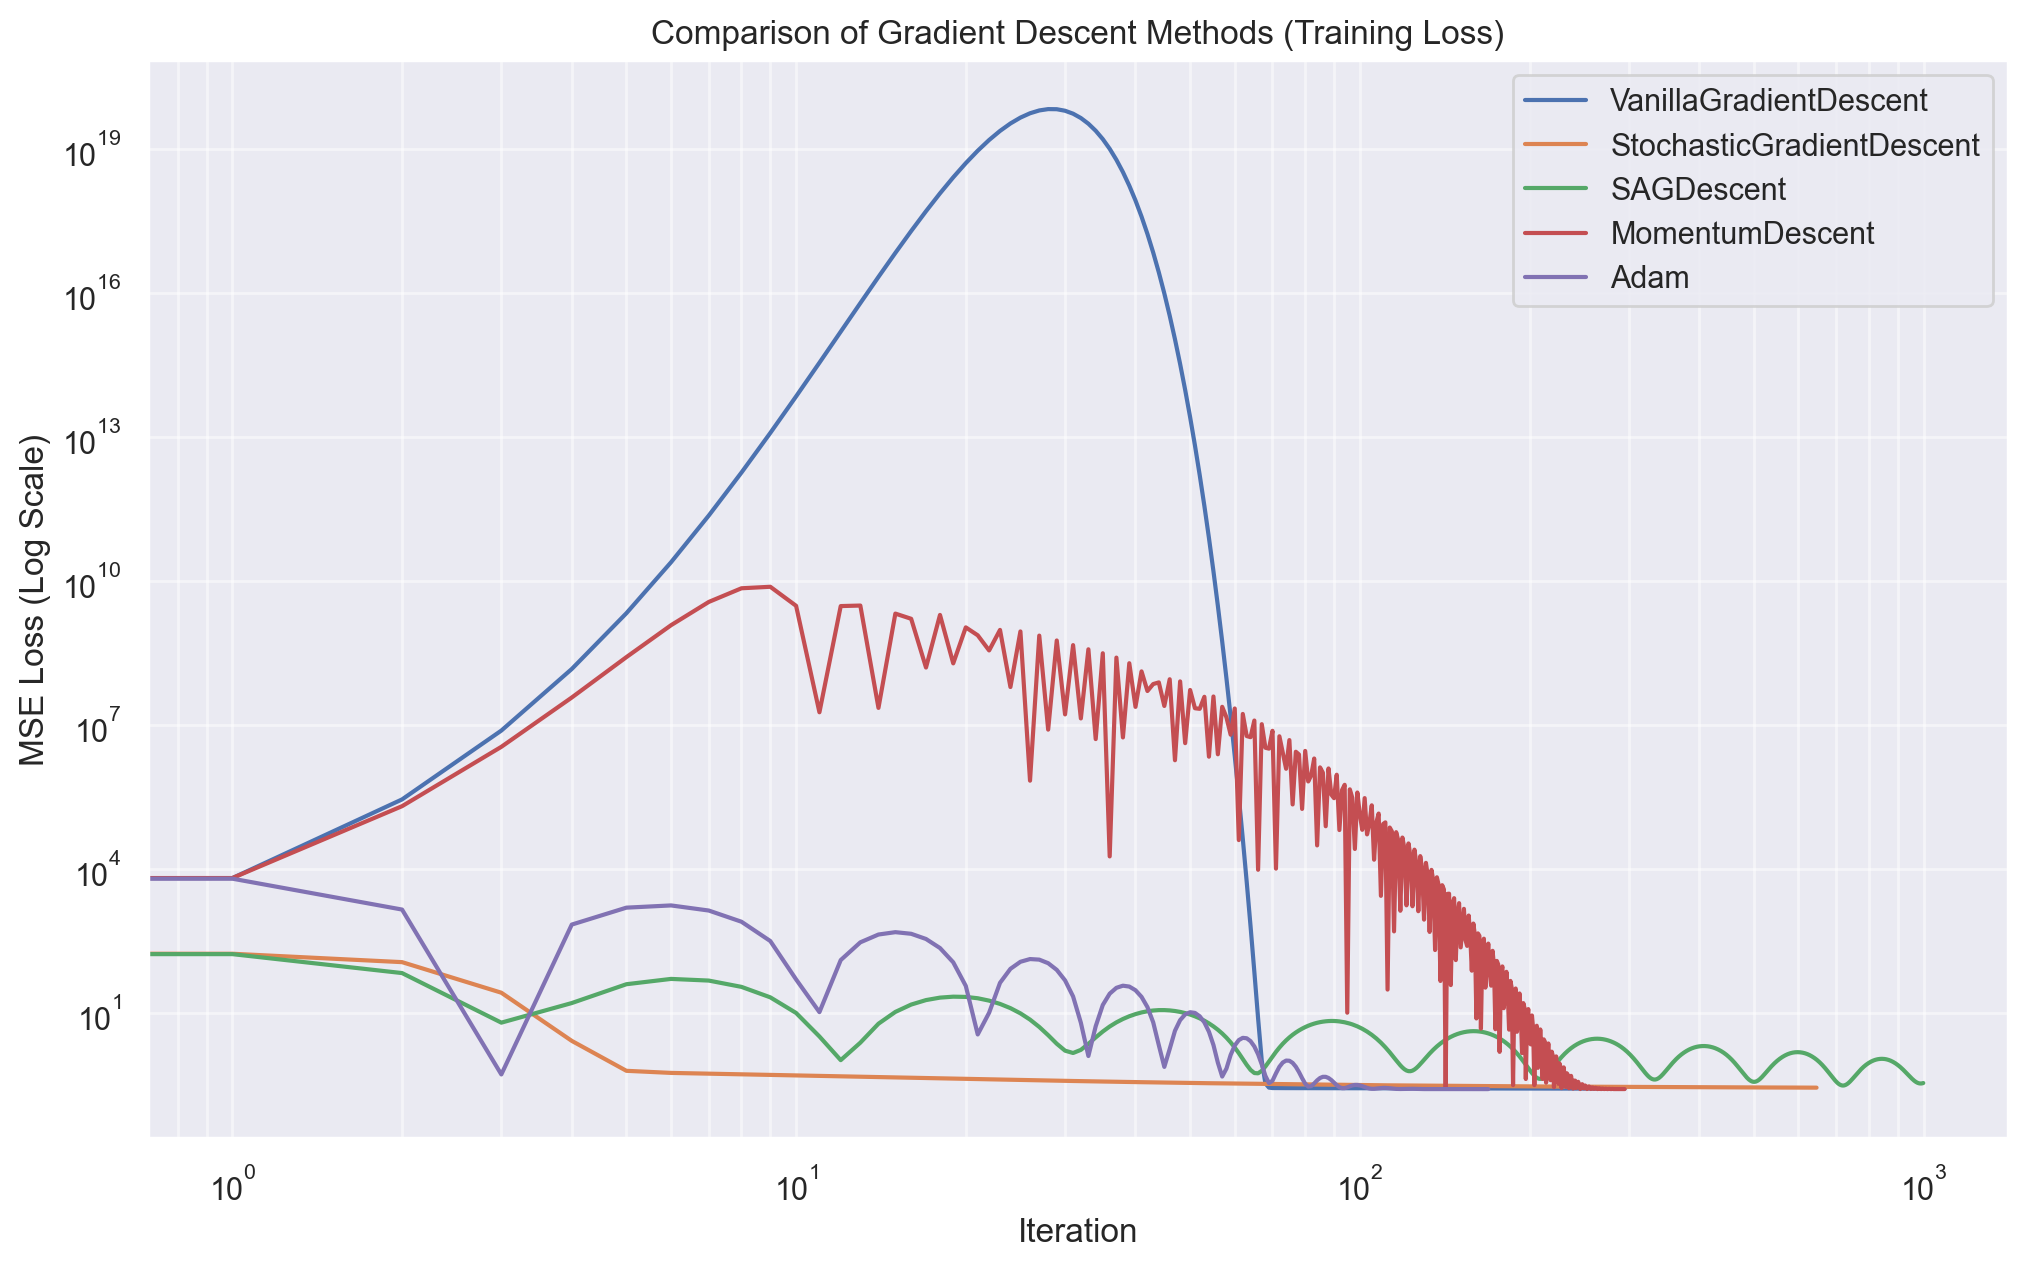

In [75]:
plt.figure(figsize=(12, 7))

for method_name, history in model_iter_history.items():
    plt.plot(history[:1000], label=method_name)

plt.title('Comparison of Gradient Descent Methods (Training Loss)')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss (Log Scale)')
plt.loglog()
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()

я сколько ни пытался, не заводится SAGD нормально + его ещё на векторизованную версию не переписать, т.к. нам нужно соблюдать SOLID (nobody cares about it though)

Все же стало интересно для двух проклятых методов подобрать batch_size и посмотреть можно ли в $< 1000$ итераций уложиться и выбить нормальный $R^2$

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, $k = 10$) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [76]:
from time import time

In [77]:
batch_sizes = 2 ** np.arange(10)
launchs_cnt = 10
optimal_lambda = np.float64(0.385662)

avg_times = []
avg_iters = []

for batch_size in batch_sizes:
    time_s = []
    iter_cnt = []

    for _ in range(launchs_cnt):
        optimizer = StochasticGradientDescent(
            lr_schedule=TimeDecayLR(optimal_lambda),
            batch_size=batch_size,
            max_iter=2500,
        )

        model = CustomLinearRegression(optimizer=optimizer)
        
        start_time = time()
        model.fit(X_train, y_train)
        end_time = time()
        
        time_s.append(end_time - start_time)
        iter_cnt.append(len(model.loss_history) - 1)
        
    mean_time = np.mean(time_s)
    mean_iter = np.mean(iter_cnt)
    
    avg_times.append(mean_time)
    avg_iters.append(mean_iter)

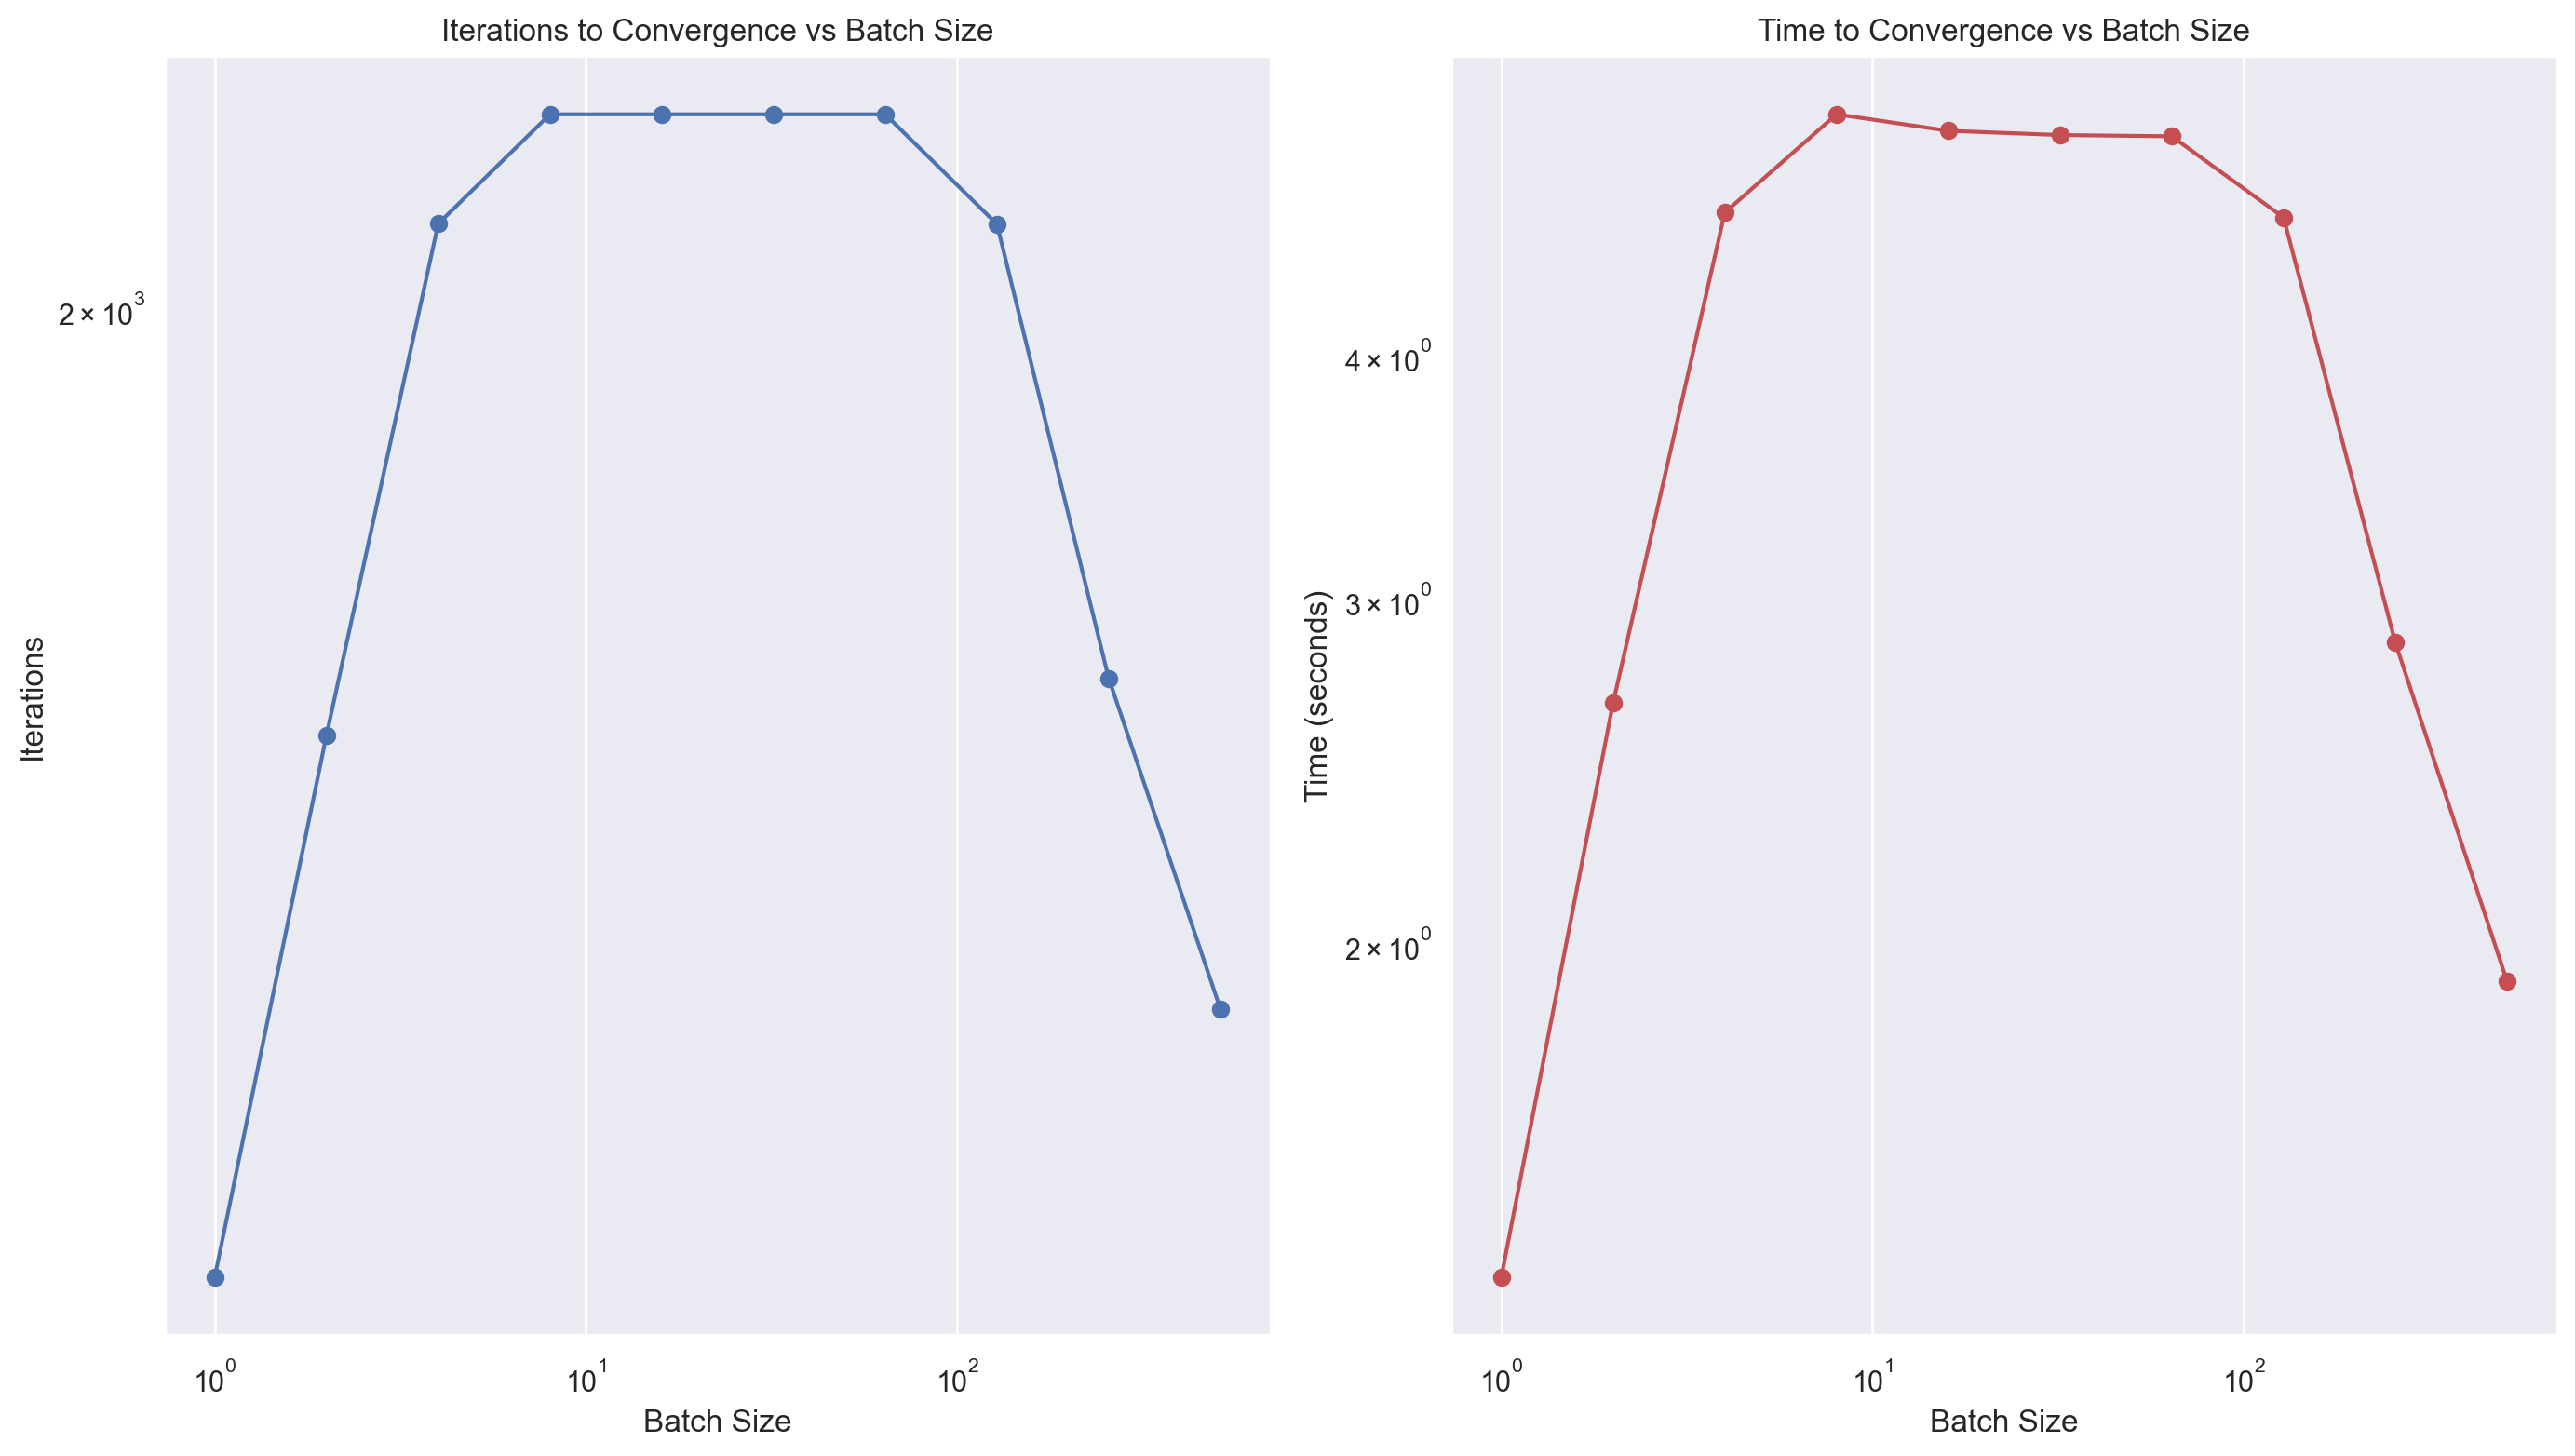

In [78]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.plot(batch_sizes, avg_iters, marker='o', linestyle='-', color='b')
plt.title('Iterations to Convergence vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Iterations')
plt.grid(True)
plt.loglog('log') 


plt.subplot(1, 2, 2)
plt.plot(batch_sizes, avg_times, marker='o', linestyle='-', color='r')
plt.title('Time to Convergence vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.loglog()

plt.tight_layout()
plt.show()

**Выводы:** если мы берём маленький батч, то нам понадобиться больше итераций для сходимости, т.к. нам нужно учесть каждый объект хотя бы раз вычисления градиента, но т.к. у нас ```batch_size``` маленький + случайный по индексам, то такому оптимизатору может понадобиться в несколько раз больше итераций. В общем тут ещё есть несколько нюансов (но их не вижу смысла расписывать, т.к. буквально буду цитировать этот вопрос со [stackexchange](https://stats.stackexchange.com/questions/316464/how-does-batch-size-affect-convergence-of-sgd-and-why))

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация – это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать $L_2$-регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс `linear_regression.L2Regularization`, следуя интерфейсу и докуметации.

Используя регуляризованный лосс в эксприментах, найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 5 графиков).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [79]:
from linear_regression import L2Regularization

In [ ]:
lambdas = np.logspace(-6, 3, num=12)
mus = np.logspace(-5, 1, num=7)

optimizers = [
    (VanillaGradientDescent, {}),
    (StochasticGradientDescent, {"batch_size": 128}),
    (SAGDescent, {"batch_size": 128, "max_iter" : 2800}),
    (MomentumDescent, {}),
    (Adam, {}),
]

best_params_reg = {
    opt_cls.__name__: {"lambda": None, "mu": None} for opt_cls, _ in optimizers
}
model_iter_history_reg = {opt_cls.__name__: None for opt_cls, _ in optimizers}

models_res_reg = []

for opt_cls, kwargs in optimizers:
    class_name = opt_cls.__name__
    best_loss = float("inf")

    lambda_search_kwargs = kwargs.copy()
    lambda_search_max_iter = lambda_search_kwargs.pop("max_iter", 300)

    for lr in lambdas:
        for mu in mus:
            lr_scheduler = TimeDecayLR(lr)
            optimizer = opt_cls(lr_scheduler, max_iter=lambda_search_max_iter, **lambda_search_kwargs)
            loss_fn = L2Regularization(MSELoss(), mu_rate=mu)
            model = CustomLinearRegression(optimizer, loss_function=loss_fn)

            model.fit(X_train, y_train)

            if not np.all(np.isfinite(model.w)):
                continue

            validate_pred = model.predict(X_val)

            if not np.all(np.isfinite(validate_pred)):
                continue

            mse_val = mse(y_val, validate_pred)

            if np.isnan(mse_val) or mse_val > 1e15:
                continue

            if mse_val < best_loss:
                best_loss = mse_val
                best_params_reg[class_name] = {"lambda": lr, "mu": mu}

    best_lr = best_params_reg[class_name]["lambda"]
    best_mu = best_params_reg[class_name]["mu"]

    best_max_iter = kwargs.get('max_iter', 1000)
    best_kwargs = {k: v for k, v in kwargs.items() if k != 'max_iter'}
        
    best_lr_scheduler = TimeDecayLR(best_lr)
    best_optimizer = opt_cls(best_lr_scheduler, **best_kwargs)
    best_loss_fn = L2Regularization(MSELoss(), mu_rate=best_mu)
    best_model = CustomLinearRegression(best_optimizer, loss_function=best_loss_fn)

    best_model.fit(X_train, y_train)
    model_iter_history_reg[class_name] = best_model.loss_history

    train_pred = best_model.predict(X_train)
    test_pred = best_model.predict(X_test)

    cur_res = {
        "Method": class_name,
        "Best Lambda": best_lr,
        "Best Mu": best_mu,
        "Train MSE": mse(y_train, train_pred),
        "Test MSE": mse(y_test, test_pred),
        "Test R2": r2_score(y_test, test_pred),
        "Iterations": len(best_model.loss_history) - 1,
    }
    models_res_reg.append(cur_res)

/Users/lilrain/hse/machine-learning-1/ml1-2026-spring/homework-practice/homework-practice-02-gd/.venv/lib/python3.14/site-packages/numpy/_core/_methods.py:132: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/lilrain/hse/machine-learning-1/ml1-2026-spring/homework-practice/homework-practice-02-gd/linear_regression.py:34: RuntimeWarning: overflow encountered in square
  return np.mean((X @ w - y) ** 2)
/Users/lilrain/hse/machine-learning-1/ml1-2026-spring/homework-practice/homework-practice-02-gd/linear_regression.py:134: RuntimeWarning: overflow encountered in scalar multiply
  return self.core_loss.loss(X, y, w) + (self.mu_rate / 2) * np.sum(w**2)
/Users/lilrain/hse/machine-learning-1/ml1-2026-spring/homework-practice/homework-practice-02-gd/descents.py:86: RuntimeWarning: overflow encountered in square
  if np.sum(loss_delta**2) < self.tolerance:
/Users/lilrain/hse/machine-learning-1/ml1-2026-spring/homework-practice/

In [81]:
pd_results_reg = pd.DataFrame(models_res_reg)
pd_results_reg

,Method,Best Lambda,Best Mu,Train MSE,Test MSE,Test R2,Iterations
0,VanillaGradientDescent,0.533670,0.00001,0.278022,0.272345,0.749545,308
1,StochasticGradientDescent,0.533670,0.00100,0.277864,0.272647,0.749267,1000
2,SAGDescent,0.081113,0.00010,0.566066,0.553427,0.491055,578
3,MomentumDescent,0.533670,0.00001,0.260523,0.254864,0.765621,299
4,Adam,3.511192,0.00001,0.259217,0.253389,0.766977,135


сделаем сравнительные таблицы чтобы наглядно продемонстрировать разницу между лоссом с регуляризацией и без

In [82]:
comparison = pd.merge(
    pd_results.rename(
        columns={
            "Train MSE": "Train MSE (no reg)",
            "Test MSE": "Test MSE (no reg)",
            "Test R2": "Test R2 (no reg)",
            "Iterations": "Iter (no reg)",
            "Best Lambda": "Lambda (no reg)",
        }
    ),
    pd_results_reg.rename(
        columns={
            "Train MSE": "Train MSE (L2)",
            "Test MSE": "Test MSE (L2)",
            "Test R2": "Test R2 (L2)",
            "Iterations": "Iter (L2)",
            "Best Lambda": "Lambda (L2)",
        }
    ),
    on="Method",
)

print(comparison.to_string(index=False))

                   Method  Lambda (no reg)  Train MSE (no reg)  Test MSE (no reg)  Test R2 (no reg)  Iter (no reg)  Lambda (L2)  Best Mu  Train MSE (L2)  Test MSE (L2)  Test R2 (L2)  Iter (L2)
   VanillaGradientDescent         1.610262            0.264842           0.259412          0.761439            295     0.533670  0.00001        0.278022       0.272345      0.749545        308
StochasticGradientDescent         0.385662            0.277860           0.272101          0.749769            646     0.533670  0.00100        0.277864       0.272647      0.749267       1000
               SAGDescent         0.385662            0.348451           0.342040          0.685452           1000     0.081113  0.00010        0.566066       0.553427      0.491055        578
          MomentumDescent         1.610262            0.259807           0.253933          0.766477            295     0.533670  0.00001        0.260523       0.254864      0.765621        299
                     Adam        13

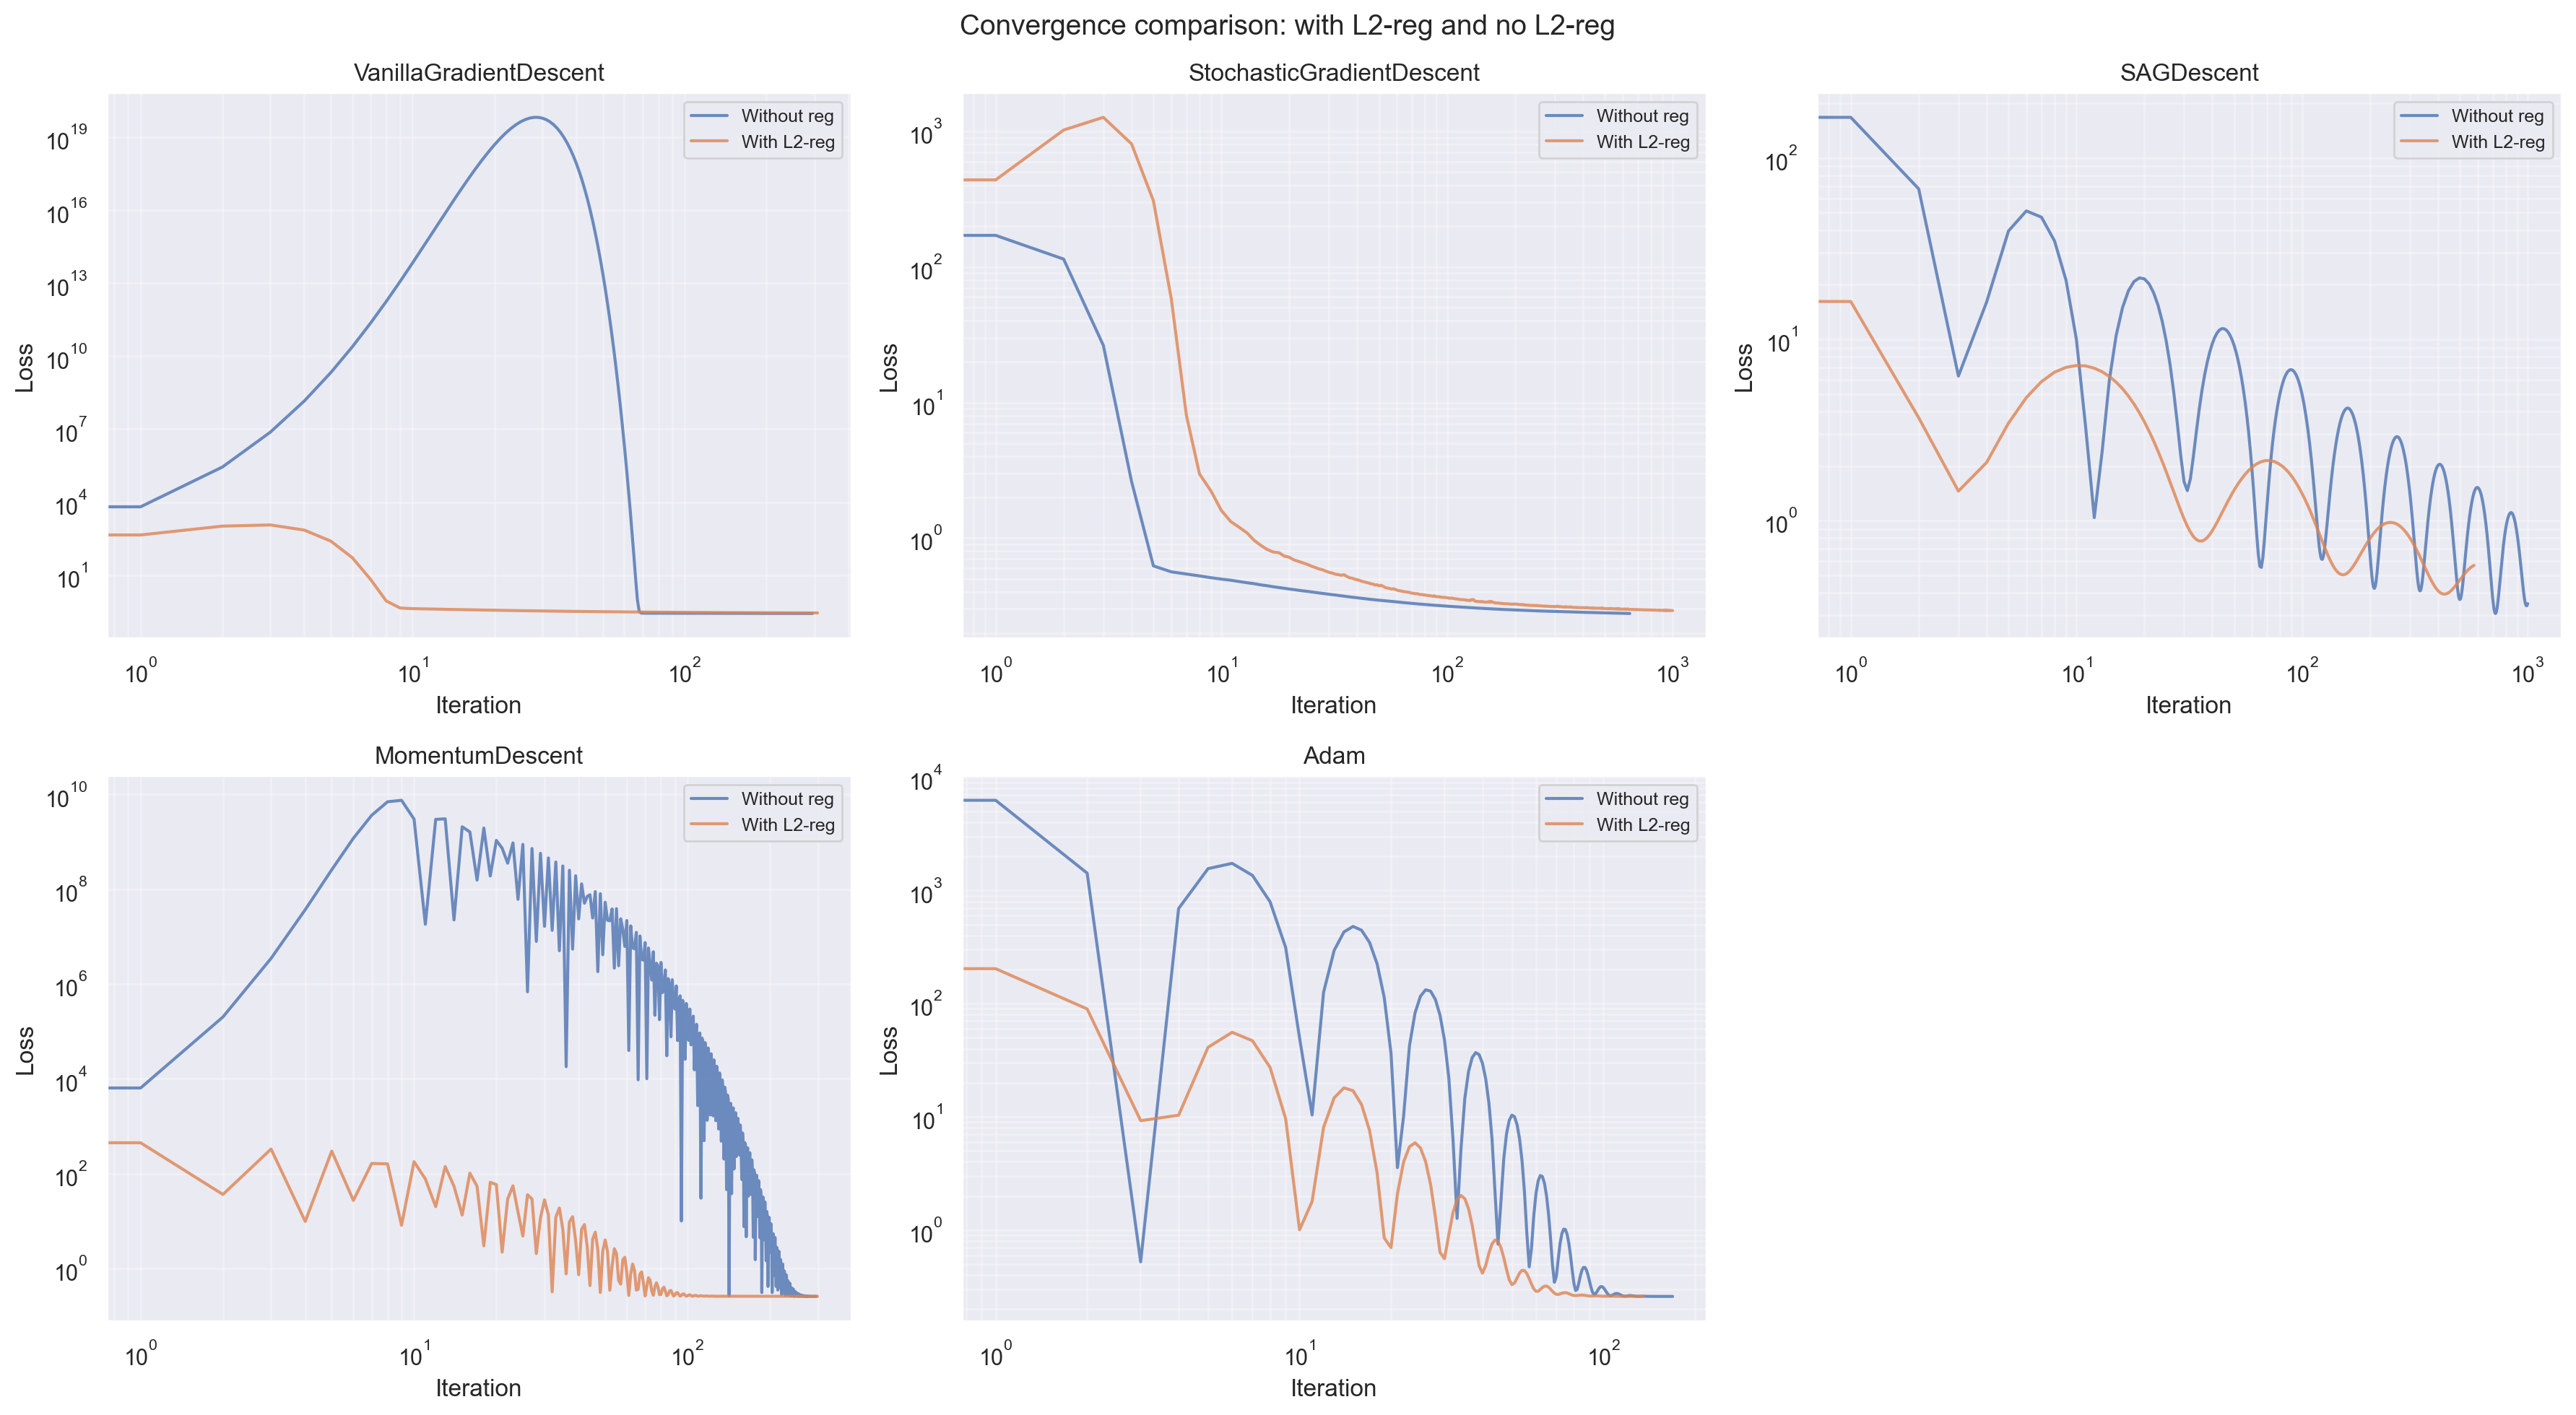

In [87]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (opt_cls, kwargs) in enumerate(optimizers):
    ax = axes[idx]
    class_name = opt_cls.__name__

    history_no_reg = model_iter_history[class_name]
    if isinstance(history_no_reg, list):
        ax.plot(history_no_reg, label='Without reg', alpha=0.8)

    history_reg = model_iter_history_reg[class_name]
    if isinstance(history_reg, list):
        ax.plot(history_reg, label='With L2-reg', alpha=0.8)

    ax.set_title(class_name, fontsize=12)
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Loss')
    ax.loglog()
    ax.legend(fontsize=9)
    ax.grid(True, which='both', ls='-', alpha=0.3)

if len(optimizers) < len(axes):
    axes[-1].set_visible(False)

plt.suptitle('Convergence comparison: with L2-reg and no L2-reg', fontsize=14)
plt.tight_layout()
plt.show()

и ещё общий график построим

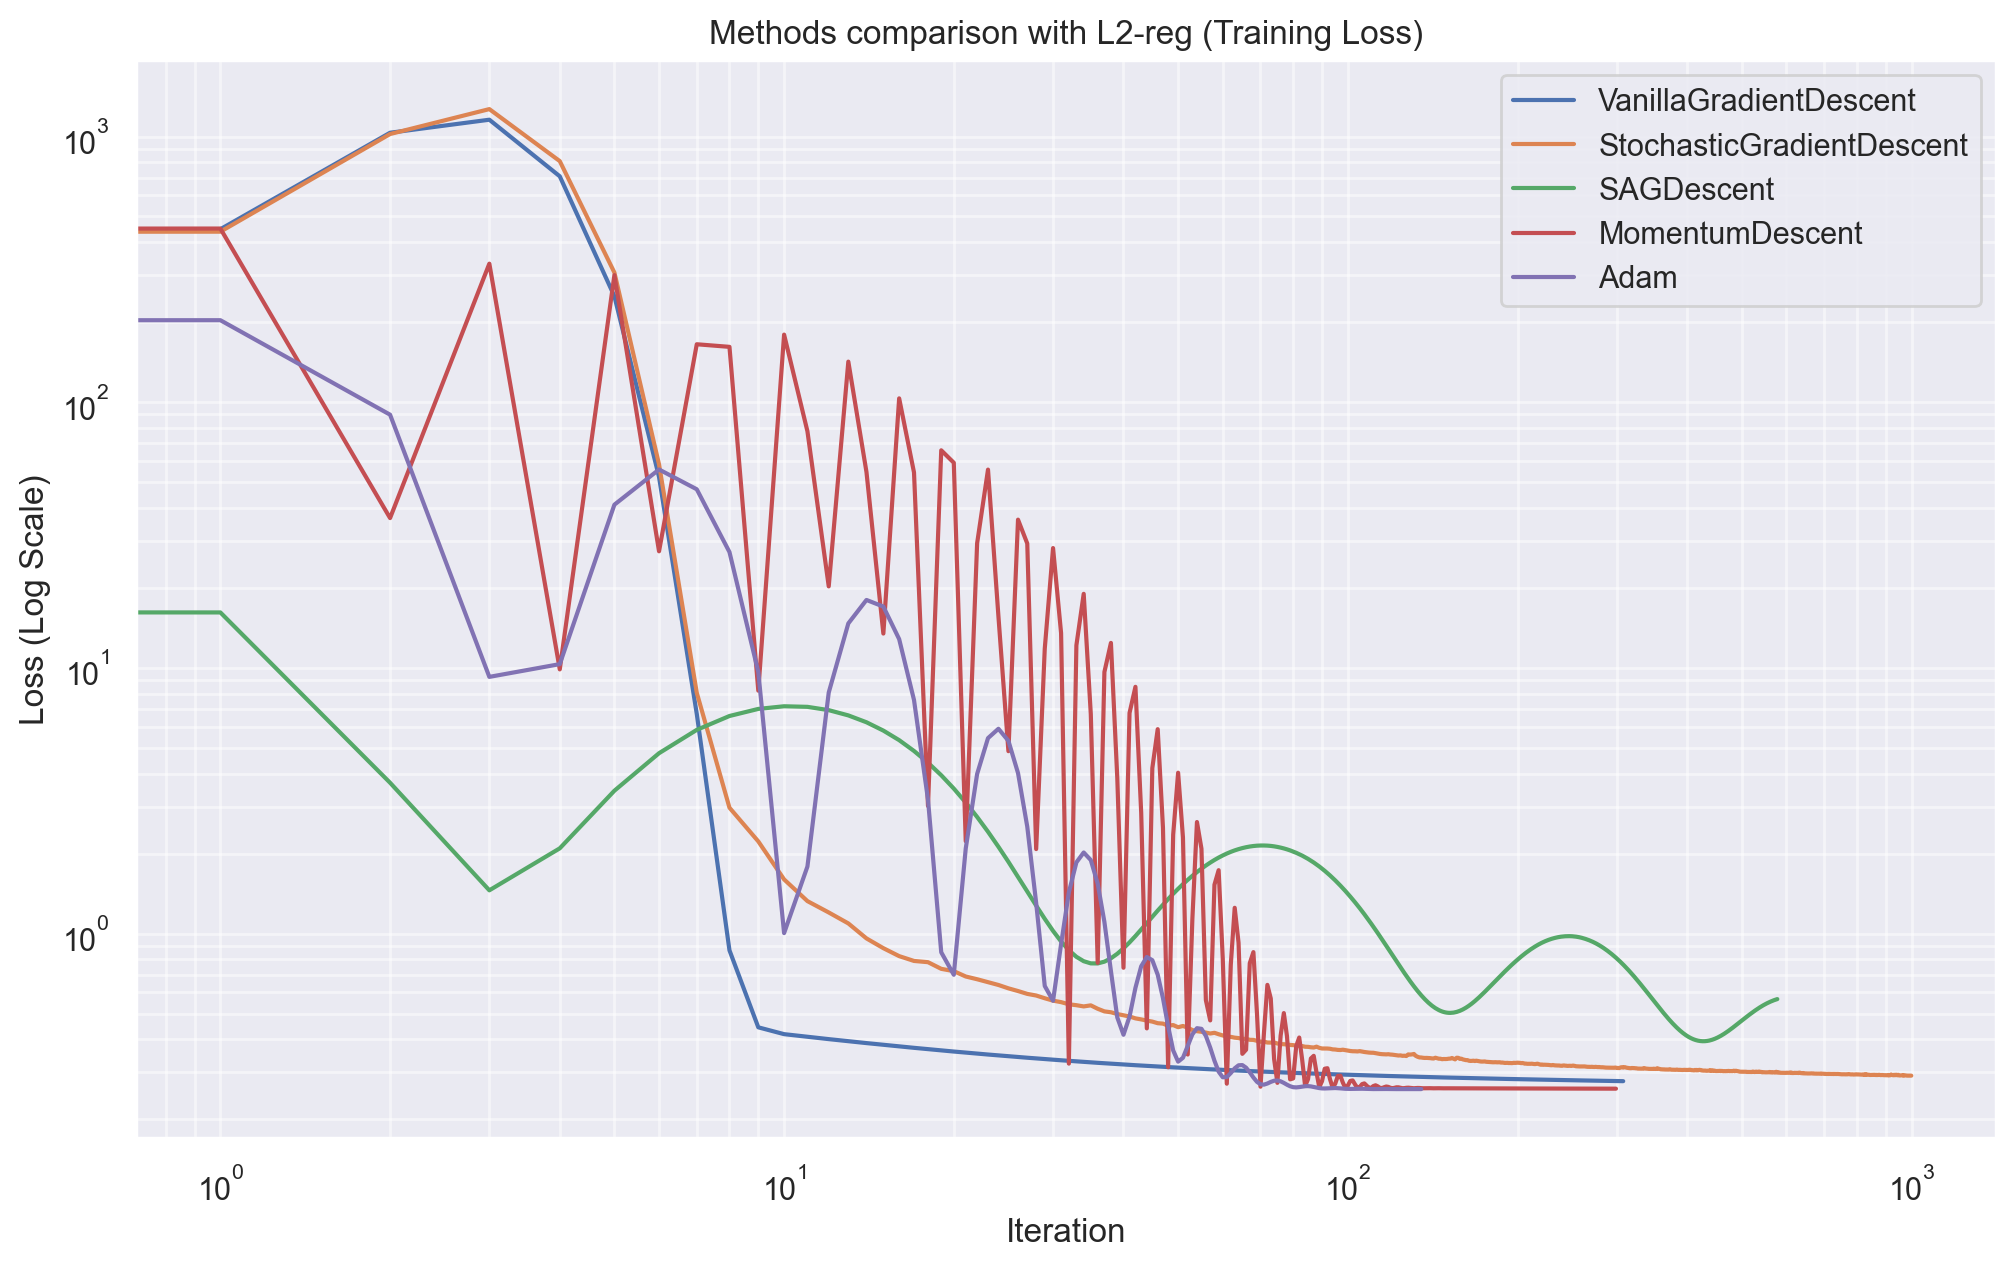

In [84]:
plt.figure(figsize=(12, 7))

for method_name, history in model_iter_history_reg.items():
    if isinstance(history, list):
        plt.plot(history[:1000], label=method_name)

plt.title('Methods comparison with L2-reg (Training Loss)')
plt.xlabel('Iteration')
plt.ylabel('Loss (Log Scale)')
plt.loglog()
plt.legend()
plt.grid(True, which='both', ls='-', alpha=0.5)
plt.show()

Допишите класс `linear_regression.L2Regularization`, следуя интерфейсу и докуметации.

Используя регуляризованный лосс в эксприментах, найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 5 графиков).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [86]:
display(X_train.shape, 187648/61)

(187648, 61)

3076.1967213114754

**Вывод:**

- Во-первых регуляризация почти ничем не помогает, т.к. основное её призвание это спасать от переобучения, но его не может быть т.к. у нас число объектов на несколько порядков (> в 3000 раз) превосходит кол-во признаков $\implies$ L2-регуляризация тут особо не нужна. Регуляризация наиболее полезна при $n \approx p$ или $n < p$, где $n \space -$ число объектов, $p \space -$ число признаков.
- Качество на ```X_train``` совсем чуть-чуть хуже (у SAGDescent сильно хуже, но он проклят), т.к. регуляризация ограничивает норму весов из-за чего модель не может идеально подстроиться под эту выборку, но это должно давать плюс в виде лучшей обобщающей способности, но на конкретно наших данных она осталось той же, если верить метрике $R^2$
- Но вот что видно невооруженным глазом, так это отсутствие взрывающихся лоссов по мере обучения модели, здесь регуляризация справилась на ура, т.к. она действительно хорошо штрафовала за большую норму весов, из-за чего лосс не взрывался и гораздо плавнее сходился (чего только ```VanillaGradientDescent``` и ```MomentumDescent``` стоят)

## Задание 8. Альтернативные функции потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **LogCosh** и **HuberLoss**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

$$
L_{\text{Huber}}(y, a) = \frac{1}{n} \sum_{i=1}^{n}
\begin{cases}
   \frac{1}{2} (a_i - y_i)^2, & \text{если } |a_i - y_i| < \delta, \\
   \delta \cdot |a_i - y_i| - \frac{1}{2} \delta^2, & \text{если } |a_i - y_i| \geq \delta,
\end{cases}
$$

Самостоятельно продифференцируйте данные функции потерь чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

**Решение:**

- Начнём с **LogCosh**, для начала немного преобразуем его, для стабильности метода будем считать, что $x := a - y > 0$
$$
    \log(\cosh(x)) = \log(\frac{e^x + e^{-x}}{2})
$$
$$
    L(y, a) = \log(\cosh())
$$

Программно реализуйте функции потерь и их градиенты для LogCosh и HuberLoss в файле `linear_regression.py`. После этого обучите все пять методов градиентного спуска (без регуляризации) с этими лоссами аналогично заданию 5 и сравните качество с результатами из задания 5, где использовался MSE.

Имплементировать эти функции потерь необходимо при помощи наследования от `linear_regression.LossFunction` и имплементирования всех абстрактных методов. Аналитическое решение для этих функций выводить и имплементировать не требуется.



In [ ]:
from linear_regression import HuberLoss, LogCosh

### Кулинарно-социализационный бонус. (0.5 балла)

Как мы знаем, в феврале зима уже не объяснение, а обстоятельство непреодолимой силы - и лучший способ спорить с ней это поделиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.